## Assignment 2

**Submission deadlines:** 
- get at least 4 points by Tuesday, 23.03.2021
- remaining points: last lab session before or on Tuesday, 13.04.2021 (02.04.2021 – 06.04.2021 there is Easter break)

**Points:** Aim to get 16 out of 20+ possible points

## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problems

## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

## Problem 2: Stochastic Gradient Descent [3p]

We provide below starter code that trains a softmax regression model. Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [4p]

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Dropout [2p]

Learn about dropout:

- implement a **dropout** layer 
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 6: Data Augmentation [1p]

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, use a data loader that re-computes them for each training minibatch. The `InMemoryDataloader` assumes that the transformations are deterministic and applies them only once.

## Problem 7: Batch Normalization [1p]

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p]

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Polyak Averaging [1p]

Implement Polyak averaging. For each parameter $\theta$
keep a separate, exponentially decayed average of the past values
$$
\bar{\theta}_n = \alpha_p\bar{\theta}_{n-1} + (1-\alpha_p)\theta_n.
$$
Use that average when evaluating the model on the test set.
Validate the approach by training a model on the MNIST dataset.

## Problem 10: Hyperparameter tuner [1p]

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 11: Pruning [1p]

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to 
1. train the network, 
2. set to zero smalles weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 12: Extreme Learning Machine (ELM) [2p]

Consider a neural network with 1 hidden layer. In the extreme learning approach, the first layer is not trained, but instead, it is randomly set. It is often very large. The second (output) layer weights can then be set using the closed-form formula for linear regression. Thus, training an ELM is fast (there is no iterative optimization) and one can try many different hyperparameters, such as hidden layer size, the random distribution from which weights are sampled, the hidden activation function, and so forth.

Task: Implement an ELM for MNIST and try to reach the performance of your backpropagation-trained model.

## Problem 13: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [ ]:
%matplotlib inline

In [ ]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from tqdm.auto import tqdm

import torch
import torch.nn.functional as F
import torch.nn.utils.prune as prune
import torchvision.datasets
from torch import nn

In [ ]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [ ]:
class InMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    def __iter__(self):
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

In [ ]:
# Monkey-patch MNIST to use a more robust MIST mirror
# torchvision.datasets.MNIST.resources = [
#     (
#         "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
#         "f68b3c2dcbeaaa9fbdd348bbdeb94873",
#     ),
#     (
#         "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
#         "d53e105ee54ea40749a09fcbcd1e9432",
#     ),
#     (
#         "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
#         "9fb629c4189551a2d022fa330f9573f3",
#     ),
#     (
#         "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
#         "ec29112dd5afa0611ce80d1b7f02629c",
#     ),
# ]
torchvision.datasets.MNIST.resources = [
    (
        "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
        "f68b3c2dcbeaaa9fbdd348bbdeb94873",
    ),
    (
        "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
        "d53e105ee54ea40749a09fcbcd1e9432",
    ),
    (
        "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
        "9fb629c4189551a2d022fa330f9573f3",
    ),
    (
        "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
        "ec29112dd5afa0611ce80d1b7f02629c",
    ),
]

# torchvision.datasets.MNIST.resources = [
#     (
#     "https://github.com/golbin/TensorFlow-MNIST/raw/master/mnist/data/train-images-idx3-ubyte.gz",
#     "f68b3c2dcbeaaa9fbdd348bbdeb94873",
#     ),
#     (
#     "https://github.com/golbin/TensorFlow-MNIST/raw/master/mnist/data/train-labels-idx1-ubyte.gz",
#     "d53e105ee54ea40749a09fcbcd1e9432",
#     ),
#     (
#     "https://github.com/golbin/TensorFlow-MNIST/raw/master/mnist/data/t10k-images-idx3-ubyte.gz",
#     "9fb629c4189551a2d022fa330f9573f3",
#     ),
#     (
#     "https://github.com/golbin/TensorFlow-MNIST/raw/master/mnist/data/t10k-labels-idx1-ubyte.gz",
#     "ec29112dd5afa0611ce80d1b7f02629c",
#     ),
# ]

In [ ]:
# Load the data

batch_size = 128
data_path = "./data"

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

# Load training data, split into train and valid sets
_train = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_train.data = _train.data[:50000]
_train.targets = _train.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


## Problem 1 solution

In [ ]:
sizes = (10, 100, 1000)
matrixA1 = np.random.rand(sizes[0], sizes[0])
matrixB1 = np.random.rand(sizes[0], sizes[0])
matrixA2 = np.random.rand(sizes[1], sizes[1])
matrixB2 = np.random.rand(sizes[1], sizes[1])
matrixA3 = np.random.rand(sizes[2], sizes[2])
matrixB3 = np.random.rand(sizes[2], sizes[2])
set1 = (matrixA1, matrixB1)
set2 = (matrixA2, matrixB2)
set3 = (matrixA3, matrixB3)
sets = (set1, set2, set3)

In [ ]:
times_loops = []
for s in sets:
    m1, m2 = s
    size = m1.shape[0]
    result_matrix = np.zeros((size, size))

    start = time.time()
    for i in range(size):
        for j in range(size):
            value = 0.0
            for k in range(size):
                value += m1[i, k] * m2[k, j]
            result_matrix[i, j] = value
    end = time.time()

    times_loops.append(end - start)
print(times_loops)

[0.000858306884765625, 0.8006861209869385, 748.3435506820679]


In [ ]:
times_einsum = []
for s in sets:
    m1, m2 = s
    size = m1.shape[0]

    start = time.time()
    result_matrix = np.einsum('ij,jk->ik', m1, m2)
    end = time.time()

    times_einsum.append(end - start)
print(times_einsum)

[0.0002079010009765625, 0.0004889965057373047, 0.45883846282958984]


In [ ]:
times_numpy = []
for s in sets:
    m1, m2 = s
    size = m1.shape[0]
    result_matrix = np.zeros((size, size))

    start = time.time()
    result_matrix = m1 @ m2
    end = time.time()

    times_numpy.append(end - start)
print(times_numpy)

[0.00011110305786132812, 0.001039266586303711, 0.04657864570617676]


In [ ]:
sizes = (10, 100, 1000)
TmatrixA1 = torch.from_numpy(matrixA1)
TmatrixB1 = torch.from_numpy(matrixB1)
TmatrixA2 = torch.from_numpy(matrixA2)
TmatrixB2 = torch.from_numpy(matrixB2)
TmatrixA3 = torch.from_numpy(matrixA3)
TmatrixB3 = torch.from_numpy(matrixB3)
Tset1 = (TmatrixA1, TmatrixB1)
Tset2 = (TmatrixA2, TmatrixB2)
Tset3 = (TmatrixA3, TmatrixB3)
Tsets = (Tset1, Tset2, Tset3)


In [ ]:
times_pytorch_cpu = []
for s in Tsets:
    m1, m2 = s
    size = m1.shape[0]

    start = time.time()
    result_matrix = m1 @ m2
    end = time.time()

    times_pytorch_cpu.append(end - start)
print(times_pytorch_cpu)

[0.0010209083557128906, 0.00011777877807617188, 0.04167890548706055]


In [ ]:
times_pytorch_gpu = []
for s in Tsets:
    m1, m2 = s
    if torch.cuda.is_available():
        m1 = m1.to('cuda')
        m2 = m2.to('cuda')
    size = m1.shape[0]

    start = time.time()
    result_matrix = m1 @ m2
    end = time.time()

    times_pytorch_gpu.append(end - start)
print(times_pytorch_gpu)

[0.0001442432403564453, 4.4345855712890625e-05, 0.00015115737915039062]


In [ ]:
A = torch.rand((10000, 10000)).to('cuda')
B = torch.rand((10000, 10000)).to('cuda')

In [ ]:
torch.cuda.synchronize()
start = time.time()
result_matrix = A @ B
end = time.time()
print(end - start)

0.0004608631134033203


In [ ]:
torch.cuda.synchronize()
start = time.time()
result_matrix = A.T @ B
end = time.time()
print(end - start)

0.0005021095275878906


In [ ]:
torch.cuda.synchronize()
start = time.time()
result_matrix = A @ B.T
end = time.time()
print(end - start)

0.0003154277801513672


In [ ]:
torch.cuda.synchronize()
start = time.time()
result_matrix = A.T @ B.T
end = time.time()
print(end - start)

0.0005326271057128906


## SGD implementation - Problem 2 solution, Problem 8 first part of solution

We provide below a scaffolding for SGD. You will need to fill the TODOs while solving the assignments.

In [ ]:
def SGD(
    model,
    data_loaders,
    alpha=1e-4,
    beta=0.9,
    epsilon=0.0,
    decay=0.0,
    norm_constraint=None,
    polyak=None,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
):

    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    #
    # TODO for Problem 1.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    #
    velocities = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    polyak_weights = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    #
    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("Interrupt at any time to evaluate the best validation model so far.")
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            #
            # alpha = alpha * beta
            if epoch % 5 == 0:
              alpha = alpha * beta
            
            for x, y in data_loaders["train"]:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for (name, p), v, polyak_weight in zip(model.named_parameters(), velocities, polyak_weights):
                        if "weight" in name:
                            #
                            # TODO for Problem 1.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            # p.grad += TODO
                            #
                            # p.grad += 2 * decay * p.data
                             p.grad += 2 * decay * p

                        #
                        # TODO for Problem 1.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        # alpha = TODO
                        #
                        # if iter_ % 10000 == 0:
                        #     alpha = alpha * beta


                        #
                        # TODO for Problem 1.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        #

                        #
                        # TODO for Problem 1.1: Implement velocity updates for momentum
                        # lease make sure to modify the contents of v, not the v pointer!!!
                        #
                        # v[...] = TODO
                        # v.data = epsilon * v.data - alpha * p.grad 
                        v[...] = epsilon * v[...] - alpha * p.grad

                        #
                        # TODO for Problem 1: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        #
                        # p -= alpha * p.grad
                        # p.data = p.data + v.data
                        p += v[...]

                        # Problem 9: Polyak Averaging
                        if polyak is not None:
                            polyak_weight[...] = polyak * polyak_weight[...] + (1 - polyak) * p[...]

                        # Problem 8: Norm Constraints
                        if norm_constraint is not None:
                            if "weight" in name:
                                # Wektor d x 1
                                # print("p:", p)
                                # p_old = p * 1
                                # print(p.shape)
                                weight_norm = (p**2).sum(axis=1, keepdim=True).sqrt()
                                # print("weight_norm:", weight_norm)
                                p[...] = p[...] * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                        p[...] * (weight_norm <= norm_constraint) 
                                # p = p * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                #     p * (weight_norm <= norm_constraint)
                                # print("p:", p)

                        # Zero gradients for the next iteration
                        p.grad.zero_()

                if iter_ % log_every == 0:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    # Problem 9: Polyak Averaging
    if polyak is not None:
        print("\nLoading params from Polyak Averaging\n")
        with torch.no_grad():
            for param, polyak_weight in zip(model.parameters(), polyak_weights):
                param[...] = polyak_weight

    elif best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    plot_history(history)

----------------------------------------------------------
After epoch 30 | valid err rate:  9.77% | doing  43 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 28)

--------------------------------------------
Test error rate: 10.230%, training took 12s.
--------------------------------------------


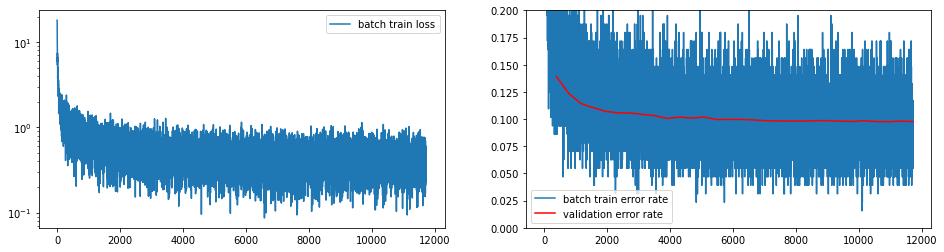

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)



model = Model(nn.Linear(28 * 28, 10))

model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Example of using Sequential with OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))


## Problem 3: Tuning the Network for MNIST [4p]  - Solution

-----------------------------------------------------------
After epoch 100 | valid err rate:  8.06% | doing 100 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 38)

-------------------------------------------
Test error rate: 8.570%, training took 32s.
-------------------------------------------


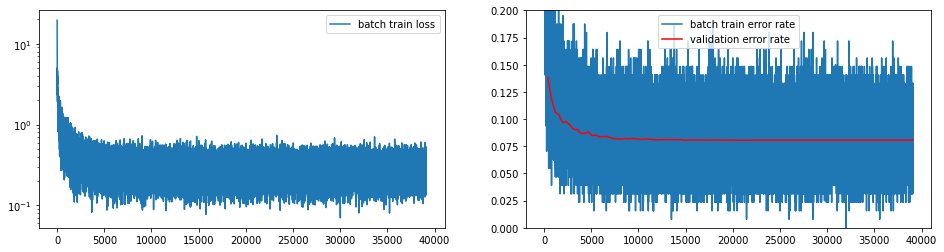

In [ ]:
model = Model(nn.Linear(28 * 28, 10))

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0.5, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.5,
    epsilon=0.1,
    decay=0.001,
    num_epochs=100,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 40 | valid err rate:  1.95% | doing  40 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 26)

-------------------------------------------
Test error rate: 1.980%, training took 26s.
-------------------------------------------


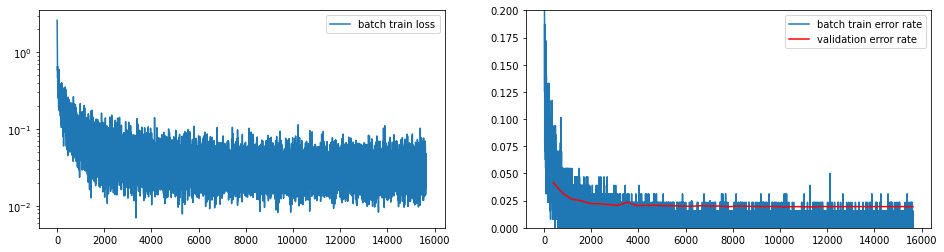

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.xavier_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.01,
    beta=0.5,
    epsilon=0.9,
    decay=0.001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  1.68% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 11)

-------------------------------------------
Test error rate: 1.720%, training took 19s.
-------------------------------------------


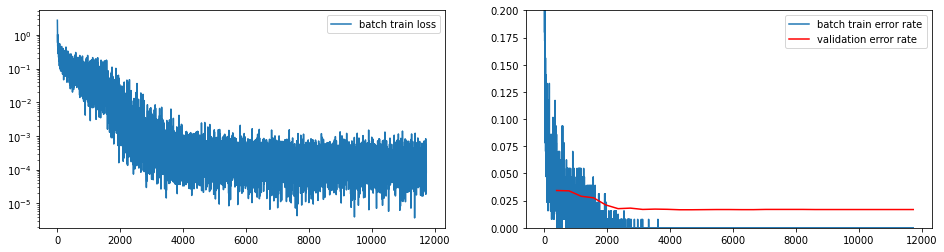

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.xavier_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.5,
    epsilon=0.9,
    decay=0.00,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 65 | valid err rate:  1.60% | doing  65 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 43)

-------------------------------------------
Test error rate: 1.550%, training took 41s.
-------------------------------------------


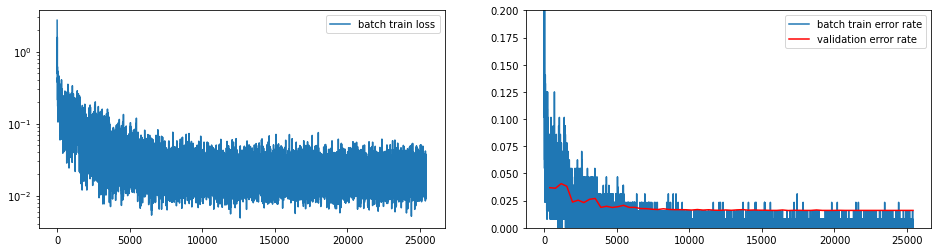

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 300),
    nn.Linear(300, 150),
    nn.Linear(150, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.xavier_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.5,
    epsilon=0.9,
    decay=0.001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 52 | valid err rate:  1.64% | doing  52 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 34)

-------------------------------------------
Test error rate: 1.650%, training took 33s.
-------------------------------------------


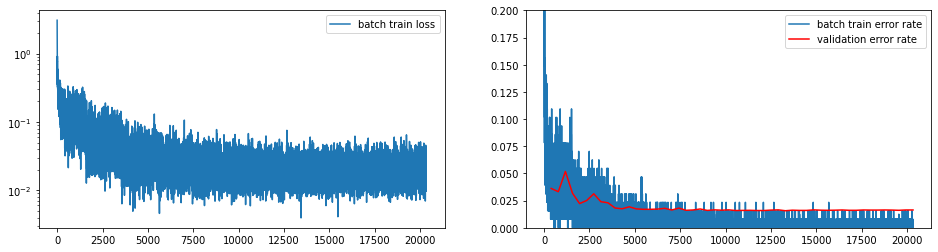

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.xavier_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.5,
    epsilon=0.9,
    decay=0.001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 58 | valid err rate:  1.58% | doing  58 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 38)

-------------------------------------------
Test error rate: 1.550%, training took 37s.
-------------------------------------------


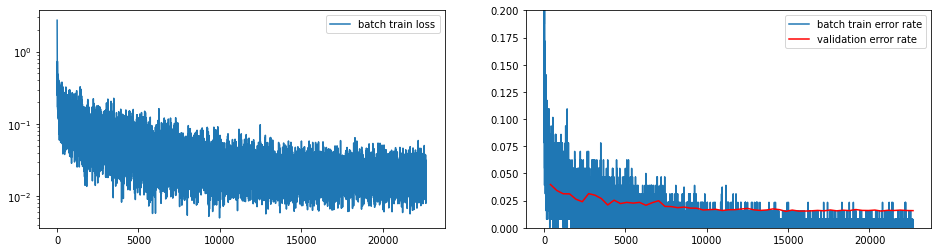

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.xavier_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
Stąd wyczytałem, że jednymi z aktualnych metod inicjalizacji macierzy wag są Normalized Xavier Weight Initialization oraz He Weight Initialization przy czym pierwsza nadaje się lepiej dla sigmoidu i tanh, a druga do relu, które akurat wybrałem u siebie. Powyżej były testy dla Normalized Xavier Weight Initialization, a poniżej znajdują się test dla He Weight Initialization (zwanego również Kaiming Initialization).

----------------------------------------------------------
After epoch 68 | valid err rate:  1.60% | doing  68 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 45)

-------------------------------------------
Test error rate: 1.480%, training took 43s.
-------------------------------------------


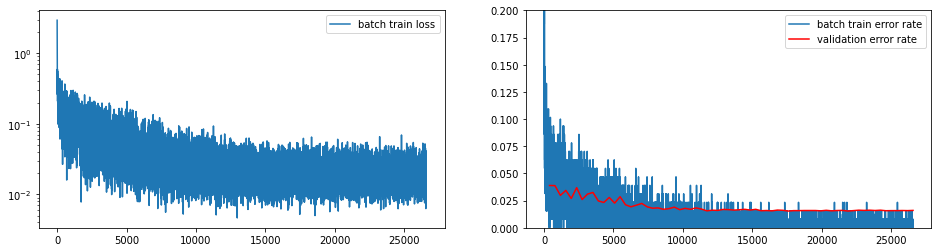

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  1.56% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 18)

-------------------------------------------
Test error rate: 1.420%, training took 19s.
-------------------------------------------


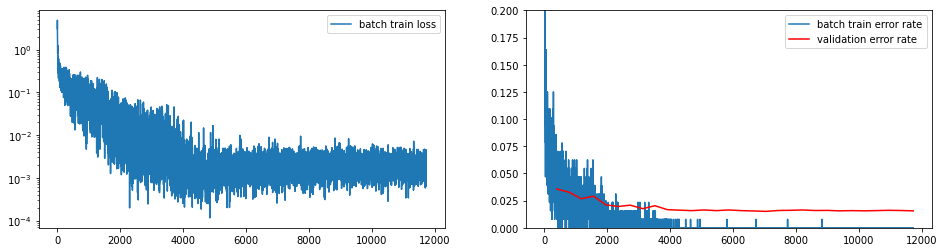

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 4: Convolutional Network [2p] - Solution

----------------------------------------------------------
After epoch 37 | valid err rate:  1.16% | doing  37 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 24)

-------------------------------------------
Test error rate: 1.150%, training took 37s.
-------------------------------------------


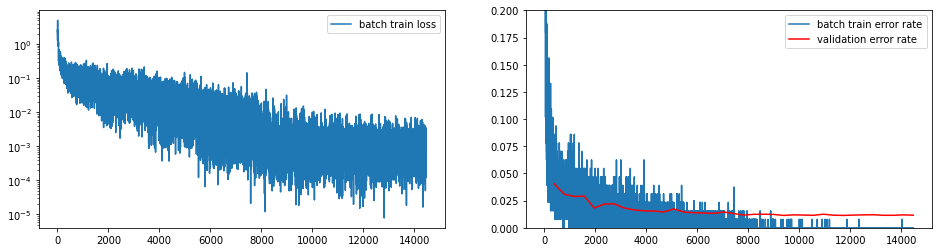

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  1.01% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 14)

-------------------------------------------
Test error rate: 0.830%, training took 31s.
-------------------------------------------


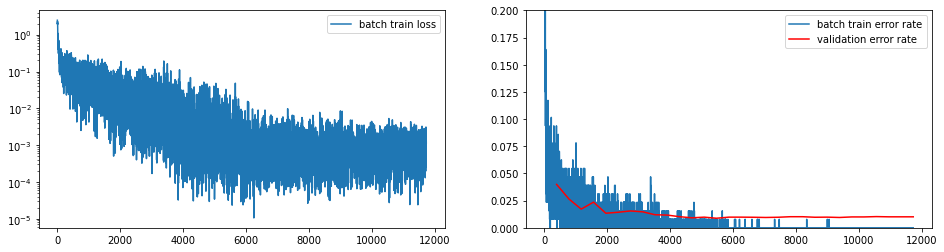

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 5: Dropout [2p] - Solution

Najpierw bez Conv2d.

-----------------------------------------------------------
After epoch 134 | valid err rate:  2.53% | doing 134 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 89)

-------------------------------------------
Test error rate: 2.850%, training took 93s.
-------------------------------------------


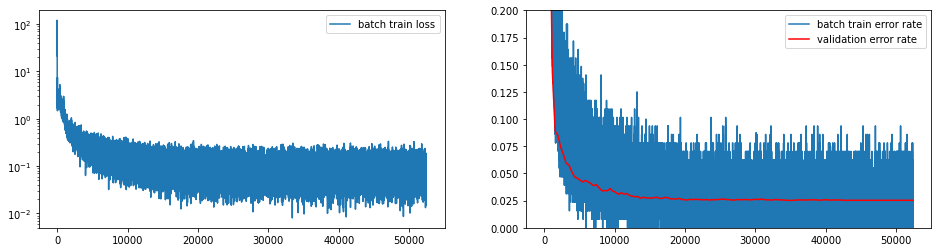

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p, mode='fan_out')
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Poniżej większa szansa na dropout i nieco wolniejsze zmniejszanie alphy (learning rate)

-----------------------------------------------------------
After epoch 118 | valid err rate:  2.01% | doing 118 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 78)

-------------------------------------------
Test error rate: 2.100%, training took 82s.
-------------------------------------------


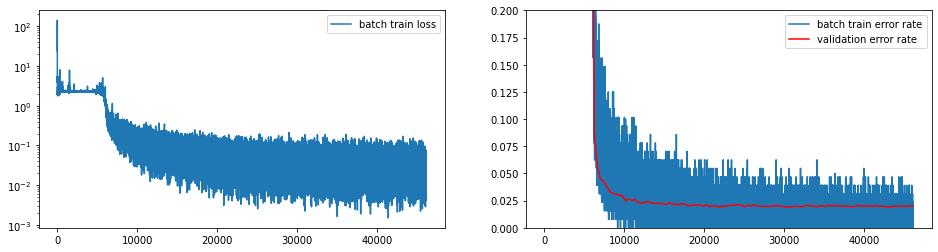

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p, mode='fan_out')
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Poniżej zmiana inicjalizacji

-----------------------------------------------------------
After epoch 118 | valid err rate:  1.39% | doing 118 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 78)

-------------------------------------------
Test error rate: 1.380%, training took 82s.
-------------------------------------------


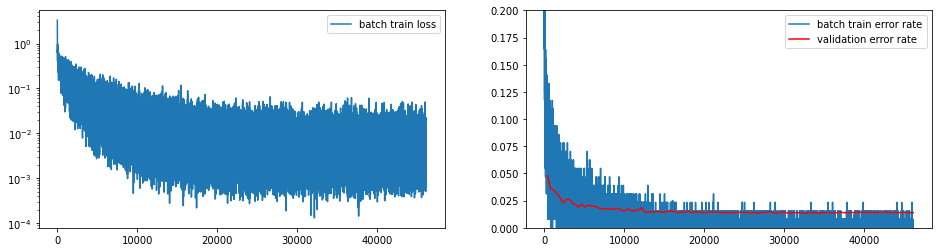

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p, mode='fan_in')
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Zapomniałem wyłączyć dropout przy testowaniu, poniżej kod uzupełniony o model.train() i model.eval()

-----------------------------------------------------------
After epoch 113 | valid err rate:  1.41% | doing 113 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 75)

-------------------------------------------
Test error rate: 1.330%, training took 86s.
-------------------------------------------


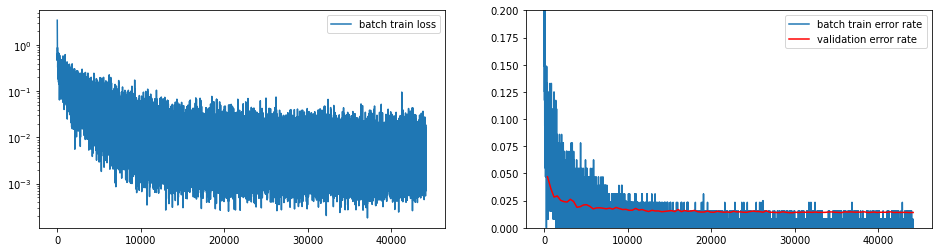

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p, mode='fan_in')
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

A teraz z Conv2d.

----------------------------------------------------------
After epoch 63 | valid err rate:  0.93% | doing  63 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 31)

-------------------------------------------
Test error rate: 0.910%, training took 65s.
-------------------------------------------


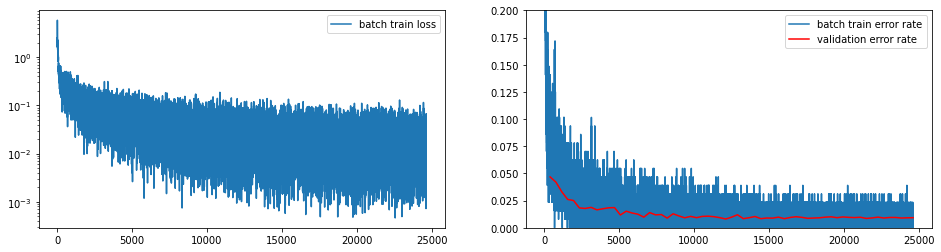

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp = nn.Dropout(p=0.3)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.dp(self.conv1(x))))
        x = self.pool(F.relu(self.dp(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Zwiększony dropout z 0.3 na 0.35

----------------------------------------------------------
After epoch 95 | valid err rate:  0.90% | doing  95 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 47)

-------------------------------------------
Test error rate: 0.900%, training took 99s.
-------------------------------------------


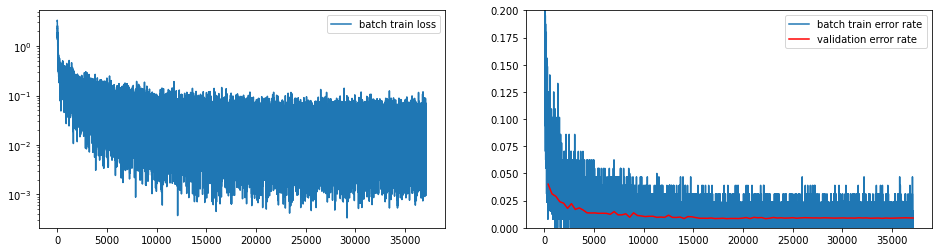

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp = nn.Dropout(p=0.35)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.dp(self.conv1(x))))
        x = self.pool(F.relu(self.dp(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=50,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 97 | valid err rate:  0.87% | doing  97 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 48)

--------------------------------------------
Test error rate: 0.680%, training took 104s.
--------------------------------------------


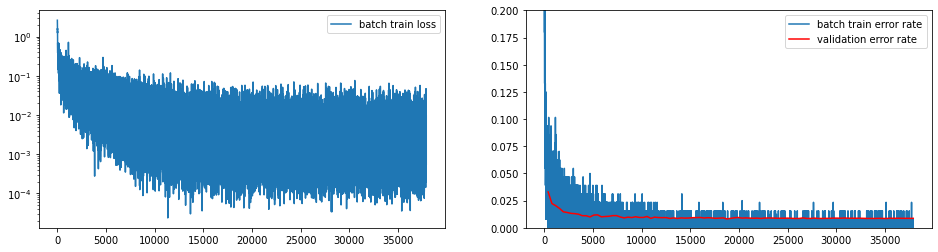

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp1 = nn.Dropout(p=0.2)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        self.dp2 = nn.Dropout(p=0.2)
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.dp1(self.fc1(x)))
        x = F.relu(self.dp2(self.fc2(x)))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=50,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 6: Data Augmentation [1p] - Solution

In [ ]:
batch_size = 128
data_path = "./data"

transform_training_set = torchvision.transforms.Compose(
    [
        torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0, hue=0),
        torchvision.transforms.RandomAffine(10, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=None),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

transform_testing_set = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test_augmented = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform_testing_set
)

# Load training data, split into train and valid sets
_train_augmented = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform_training_set
)
_train_augmented.data = _train_augmented.data[:50000]
_train_augmented.targets = _train_augmented.targets[:50000]

_valid_augmented = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform_testing_set
)
_valid_augmented.data = _valid_augmented.data[50000:]
_valid_augmented.targets = _valid_augmented.targets[50000:]

mnist_loaders_augmented = {
    "train": InMemDataLoader(_train_augmented, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid_augmented, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test_augmented, batch_size=batch_size, shuffle=False),
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


----------------------------------------------------------
After epoch 39 | valid err rate:  0.96% | doing  39 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 19)

-------------------------------------------
Test error rate: 1.030%, training took 40s.
-------------------------------------------


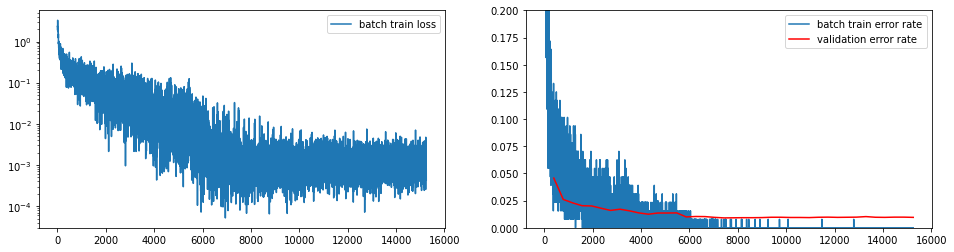

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders_augmented,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders_augmented["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

In [ ]:
mnist_dataloader = {
    'train': torch.utils.data.DataLoader(
        _train_augmented, batch_size=batch_size, shuffle=True, num_workers=6),
    'valid': torch.utils.data.DataLoader(
        _valid_augmented, batch_size=batch_size, shuffle=False, num_workers=6),
    'test': torch.utils.data.DataLoader(
        _test_augmented, batch_size=batch_size, shuffle=False, num_workers=6)
    }

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


-----------------------------------------------------------
After epoch 183 | valid err rate:  1.12% | doing 183 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 91)

--------------------------------------------
Test error rate: 0.990%, training took 184s.
--------------------------------------------


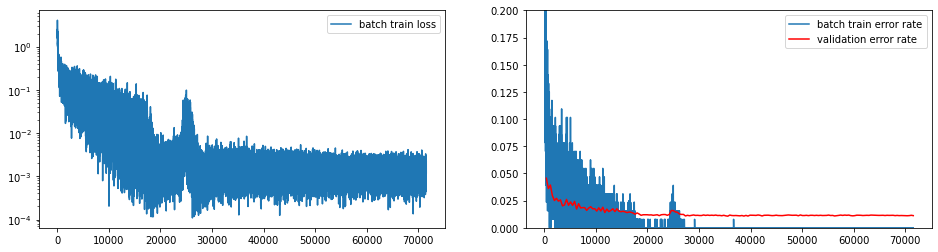

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders_augmented,
    alpha=0.1,
    beta=0.9,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders_augmented["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

In [ ]:
batch_size = 128
data_path = "./data"

transform_training_set = torchvision.transforms.Compose(
    [
        torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.RandomAffine(20, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=None),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

transform_testing_set = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test_augmented = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform_testing_set
)

# Load training data, split into train and valid sets
_train_augmented = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform_training_set
)
_train_augmented.data = _train_augmented.data[:50000]
_train_augmented.targets = _train_augmented.targets[:50000]

_valid_augmented = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform_testing_set
)
_valid_augmented.data = _valid_augmented.data[50000:]
_valid_augmented.targets = _valid_augmented.targets[50000:]

mnist_loaders_augmented = {
    "train": InMemDataLoader(_train_augmented, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid_augmented, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test_augmented, batch_size=batch_size, shuffle=False),
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
mnist_dataloader = {
    'train': torch.utils.data.DataLoader(
        _train_augmented, batch_size=batch_size, shuffle=True, num_workers=6),
    'valid': torch.utils.data.DataLoader(
        _valid_augmented, batch_size=batch_size, shuffle=False, num_workers=6),
    'test': torch.utils.data.DataLoader(
        _test_augmented, batch_size=batch_size, shuffle=False, num_workers=6)
    }

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


-----------------------------------------------------------
After epoch 193 | valid err rate:  1.08% | doing 193 epochs
-----------------------------------------------------------

Loading best params on validation set (epoch 96)

--------------------------------------------
Test error rate: 1.140%, training took 201s.
--------------------------------------------


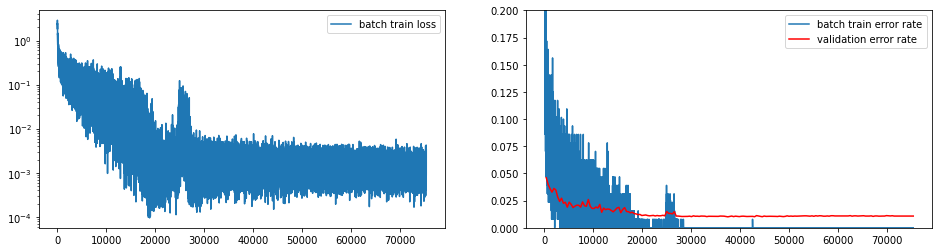

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders_augmented,
    alpha=0.1,
    beta=0.9,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders_augmented["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-----------------------------------------------------------
After epoch 306 | valid err rate:  0.51% | doing 393 epochs
-----------------------------------------------------------
Minibatch 119700  | loss  0.01 | err rate  0.78%, steps/s 17931.39
Minibatch 119800  | loss  0.03 | err rate  0.78%, steps/s 22760.73

Loading best params on validation set (epoch 196)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


---------------------------------------------
Test error rate: 0.570%, training took 6525s.
---------------------------------------------


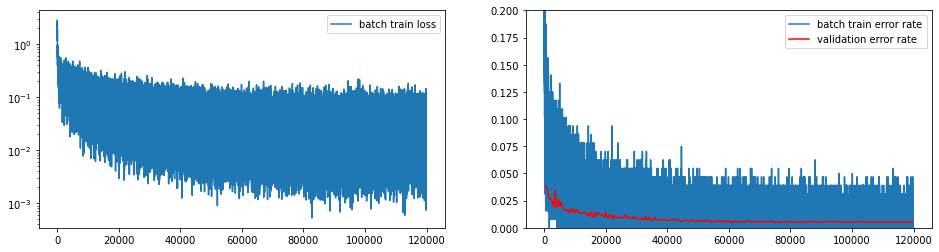

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_dataloader,
    alpha=0.1,
    beta=0.9,
    epsilon=0.9,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_dataloader["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 7: Batch Normalization [1p] - Solution

Najpierw bez CNN. Wynik na dropout'cie wynosił 1.330%

----------------------------------------------------------
After epoch 69 | valid err rate:  1.45% | doing 119 epochs
----------------------------------------------------------
Minibatch  27000  | loss  0.00 | err rate  0.00%, steps/s 101824.29
Minibatch  27100  | loss  0.00 | err rate  0.00%, steps/s 129720.84

Loading best params on validation set (epoch 59)

-------------------------------------------
Test error rate: 1.430%, training took 61s.
-------------------------------------------


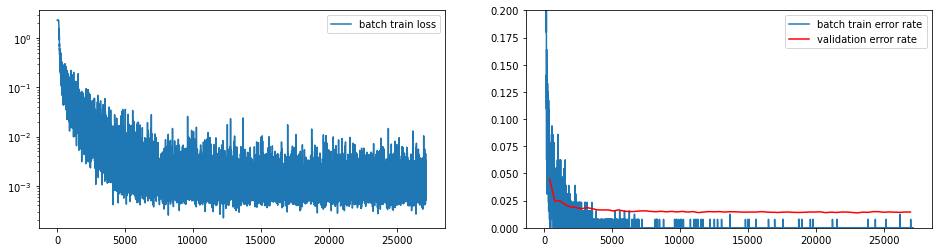

In [ ]:
model = Model(
    nn.Linear(28*28, 500),
    nn.BatchNorm1d(num_features=500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.BatchNorm1d(num_features=200),
    nn.ReLU(),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0.0, 0.01)
            # if "layers.0" in name or "layers.3" in name:
            #     nn.init.kaiming_normal_(p, mode='fan_in')
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.05,
    beta=0.7,
    epsilon=0.8,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Wynik na CNN wynosił 0.830%

Najpierw z dwiema warstwami BN.

----------------------------------------------------------
After epoch 37 | valid err rate:  1.20% | doing  73 epochs
----------------------------------------------------------
Minibatch  14500  | loss  0.00 | err rate  0.00%, steps/s 46596.49
Minibatch  14600  | loss  0.00 | err rate  0.00%, steps/s 62753.90
Minibatch  14700  | loss  0.01 | err rate  0.78%, steps/s 63166.67

Loading best params on validation set (epoch 36)

-------------------------------------------
Test error rate: 0.980%, training took 38s.
-------------------------------------------


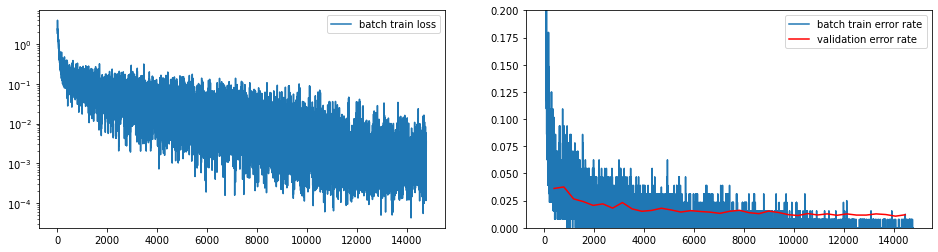

In [ ]:
class ConvNetBN(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        self.bn1 = nn.BatchNorm2d(num_features=size1)
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        self.bn2 = nn.BatchNorm2d(num_features=size2)
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.3,
    beta=0.8,
    epsilon=0.8,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Teraz tylko z drugą.

----------------------------------------------------------
After epoch 31 | valid err rate:  1.10% | doing  55 epochs
----------------------------------------------------------
Minibatch  12200  | loss  0.00 | err rate  0.00%, steps/s 41526.35
Minibatch  12300  | loss  0.00 | err rate  0.00%, steps/s 53161.60
Minibatch  12400  | loss  0.00 | err rate  0.00%, steps/s 52408.14

Loading best params on validation set (epoch 27)

-------------------------------------------
Test error rate: 0.850%, training took 32s.
-------------------------------------------


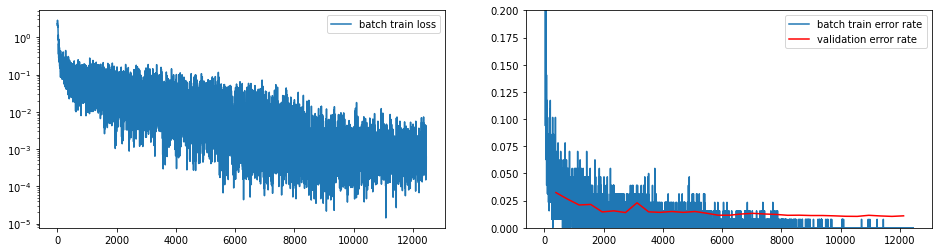

In [ ]:
class ConvNetBN(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        self.bn2 = nn.BatchNorm2d(num_features=size2)
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.2,
    beta=0.8,
    epsilon=0.8,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 16 | valid err rate:  1.01% | doing  31 epochs
----------------------------------------------------------
Minibatch   6300  | loss  0.00 | err rate  0.00%, steps/s 21515.43
Minibatch   6400  | loss  0.00 | err rate  0.00%, steps/s 27286.09

Loading best params on validation set (epoch 15)

-------------------------------------------
Test error rate: 0.800%, training took 17s.
-------------------------------------------


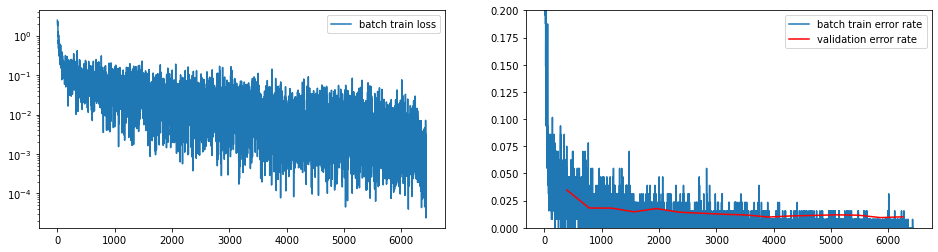

In [ ]:
class ConvNetBN(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        self.bn2 = nn.BatchNorm2d(num_features=size2)
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.2,
    beta=0.8,
    epsilon=0.8,
    decay=0.0001,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Podsumowując otrzymałem dosyć podobne wyniki, chciaż dla BN ciężej było mi dobrać dobre parametry (i wyniki potrafiły się znacząco różnić).

## Problem 8: Norm Constraints [1p] - Solution

Implementacja Norm Constraints znajduje się w SGD implementation. 


----------------------------------------------------------
After epoch 30 | valid err rate:  1.77% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 18)

-------------------------------------------
Test error rate: 1.810%, training took 26s.
-------------------------------------------


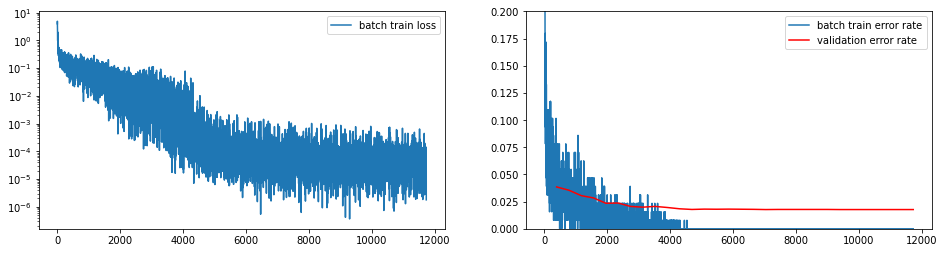

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0,
    norm_constraint=50.0,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  1.60% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 15)

-------------------------------------------
Test error rate: 1.630%, training took 26s.
-------------------------------------------


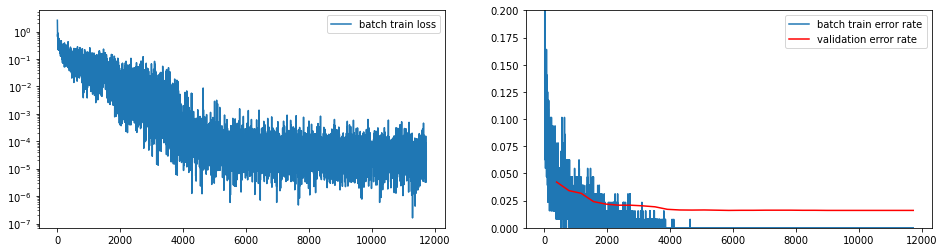

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0,
    norm_constraint=10.0,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  1.48% | doing  30 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 11)

-------------------------------------------
Test error rate: 1.740%, training took 36s.
-------------------------------------------


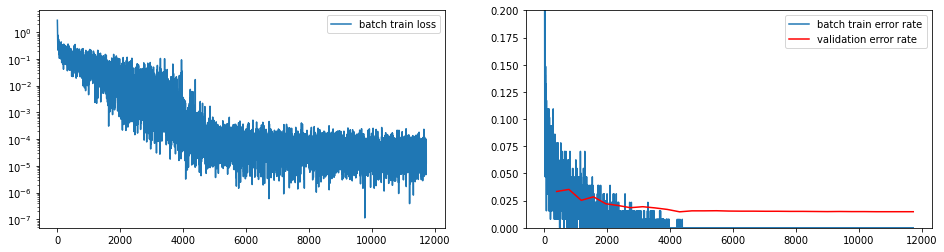

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        # return self.layers.forward(X)
        x = F.relu(self.layers[0](X))
        x = F.relu(self.layers[1](x))
        return self.layers[2](x)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Linear(28*28, 500),
    nn.Linear(500, 200),
    nn.Linear(200, 10),
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            # p.normal_(0.0, 0.5)
            nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.8,
    epsilon=0.9,
    decay=0.0,
    norm_constraint=5.0,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 61 | valid err rate:  1.16% | doing  61 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 30)

-------------------------------------------
Test error rate: 0.890%, training took 81s.
-------------------------------------------


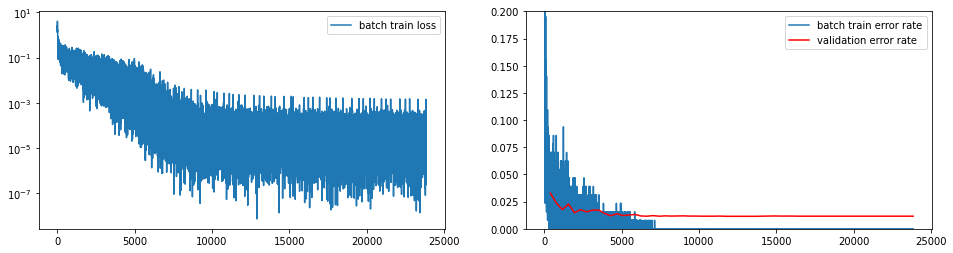

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0,
    norm_constraint=100.0,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 9: Polyak Averaging [1p] - Solution

Najpierw Conv2d bez dropout'u. Drugi test dał skuteczność nieco gorszą niż wybranie najlepszego modelu na walidacyjnym setcie (0.900% vs 0.830%).

----------------------------------------------------------
After epoch 49 | valid err rate:  1.03% | doing  49 epochs
----------------------------------------------------------

Loading params from Polyak Averaging

-------------------------------------------
Test error rate: 1.000%, training took 56s.
-------------------------------------------


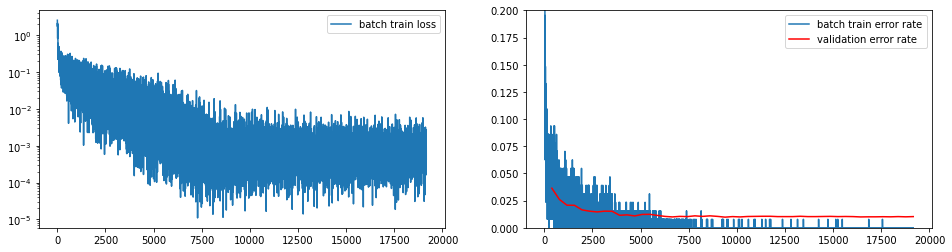

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    norm_constraint=None,
    polyak=0.5,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=2.0,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 41 | valid err rate:  1.21% | doing  41 epochs
----------------------------------------------------------

Loading params from Polyak Averaging

-------------------------------------------
Test error rate: 0.900%, training took 47s.
-------------------------------------------


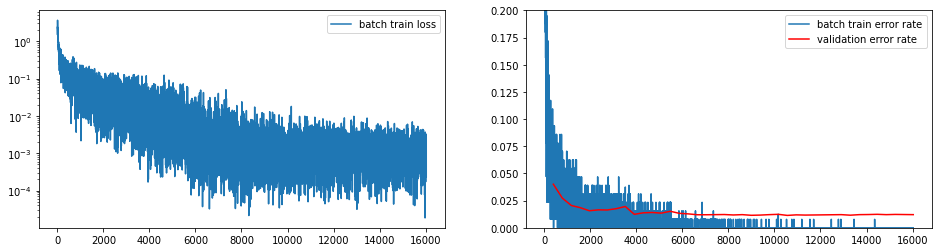

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    norm_constraint=None,
    polyak=0.9,
    num_epochs=30,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

Teraz dodatkowo z dropoutem. Udało mi się uzyskać minimalnie lepszy wynik niż w wyborze najlepszego modelu dla walidacyjnego setu (0.850% vs 0.900%).

----------------------------------------------------------
After epoch 71 | valid err rate:  0.98% | doing  71 epochs
----------------------------------------------------------

Loading params from Polyak Averaging

-------------------------------------------
Test error rate: 0.930%, training took 84s.
-------------------------------------------


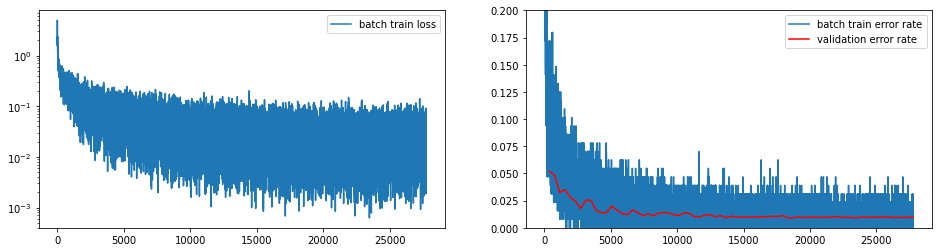

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp = nn.Dropout(p=0.35)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.dp(self.conv1(x))))
        x = self.pool(F.relu(self.dp(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    norm_constraint=None,
    polyak=0.9,
    num_epochs=50,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 64 | valid err rate:  0.86% | doing  64 epochs
----------------------------------------------------------

Loading params from Polyak Averaging

-------------------------------------------
Test error rate: 0.850%, training took 76s.
-------------------------------------------


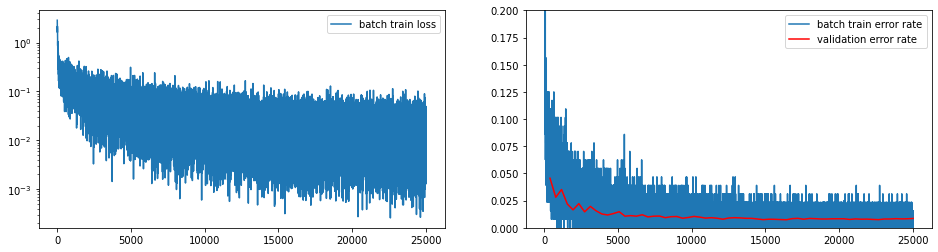

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp = nn.Dropout(p=0.35)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.dp(self.conv1(x))))
        x = self.pool(F.relu(self.dp(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    norm_constraint=None,
    polyak=0.9,
    num_epochs=50,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 50 | valid err rate:  0.88% | doing  50 epochs
----------------------------------------------------------

Loading params from Polyak Averaging

-------------------------------------------
Test error rate: 0.700%, training took 59s.
-------------------------------------------


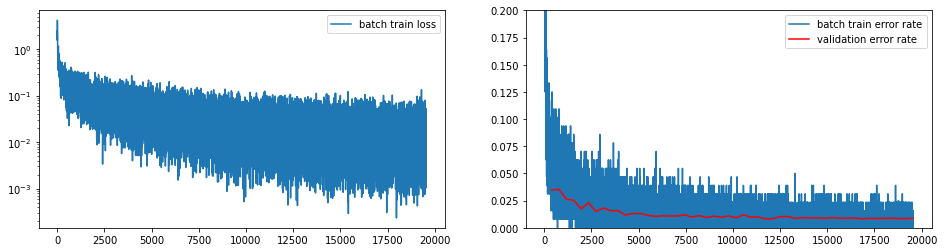

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # image size = 28 x 28
        size1 = 6
        size2 = 16
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        self.dp = nn.Dropout(p=0.35)
        self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                               stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), 120)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.dp(self.conv1(x))))
        x = self.pool(F.relu(self.dp(self.conv2(x))))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = ConvNet()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
model.train()
SGD(
    model,
    mnist_loaders,
    alpha=0.1,
    beta=0.7,
    epsilon=0.9,
    decay=0.0001,
    norm_constraint=None,
    polyak=0.9,
    num_epochs=50,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

model.eval()
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 10: Hyperparameter tuner [1p] - Solution

In [ ]:
def train_model_with_random_params(
    model_class,
    loader,
    out_channels1=[4, 10], 
    out_channels2=[10, 20], 
    linear1=[100, 400], 
    linear2=[50, 200], 
    linear3=10,
    alpha=[0.01, 0.1],
    beta=[0.5, 0.9],
    epsilon=[0.8, 0.9],
    decay=[0.00001, 0.0001],
    norm_constraint=None,
    polyak=None,
    num_epochs=30,
    max_num_epochs=50,
    patience_expansion=1.5,
    log_every=100,
    device="cuda"):

    if type(out_channels1) in [list,tuple]:
        out_channels1 = np.random.randint(low=out_channels1[0], high=out_channels1[1])
    if type(out_channels2) in [list,tuple]:
        out_channels2 = np.random.randint(low=out_channels2[0], high=out_channels2[1])
    if type(linear1) in [list,tuple]:
        linear1 = np.random.randint(low=linear1[0], high=linear1[1])
    if type(linear2) in [list,tuple]:
        linear2 = np.random.randint(low=linear2[0], high=linear2[1])

    model = model_class(out_channels1, out_channels2, linear1, linear2, linear3)

    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                if "fc" in name:
                    # p.normal_(0.0, 0.5)
                    nn.init.kaiming_normal_(p)
            elif "bias" in name:
                p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

    # On GPU enabled devices set device='cuda' else set device='cpu'
    t_start = time.time()
    # SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda")
    model.train()

    if type(alpha) in [list,tuple]:
        alpha = np.random.uniform(low=alpha[0], high=alpha[1])
    if type(beta) in [list,tuple]:
        beta = np.random.uniform(low=beta[0], high=beta[1])
    if type(epsilon) in [list,tuple]:
        epsilon = np.random.uniform(low=epsilon[0], high=epsilon[1])
    if type(decay) in [list,tuple]:
        decay = np.random.uniform(low=decay[0], high=decay[1])
    if norm_constraint is not None:
        norm_constraint = np.random.uniform(low=norm_constraint[0], high=norm_constraint[1])
    if polyak is not None:
        polyak = np.random.uniform(low=polyak[0], high=polyak[1])

    SGD(
        model,
        loader,
        alpha=alpha,
        beta=beta,
        epsilon=epsilon,
        decay=decay,
        norm_constraint=norm_constraint,
        polyak=polyak,
        num_epochs=num_epochs,
        max_num_epochs=max_num_epochs,
        patience_expansion=patience_expansion,
        log_every=log_every,
        device=device,
    )
    params = {
        "out_channels1": out_channels1, 
        "out_channels2": out_channels2, 
        "linear1": linear1, 
        "linear2": linear2, 
        "linear3": linear3,
        "alpha": alpha,
        "beta": beta,
        "epsilon": epsilon,
        "decay": decay,
        "norm_constraint": norm_constraint,
        "polyak": polyak,
    }

    model.eval()
    test_err_rate = compute_error_rate(model, mnist_loaders["test"])
    m = (
        f"Test error rate: {test_err_rate * 100.0:.3f}%, "
        f"training took {time.time() - t_start:.0f}s."
    )
    print("{0}\n{1}\n{0}".format("-" * len(m), m))
    return test_err_rate, params

In [ ]:
def hyperparameter_tuner(
    loader,
    num_of_trials=20,
    out_channels1=[4, 10], 
    out_channels2=[10, 20], 
    linear1=[100, 400], 
    linear2=[50, 200], 
    linear3=10,
    alpha=[0.01, 0.1],
    beta=[0.5, 0.9],
    epsilon=[0.8, 0.9],
    decay=[0.00001, 0.0001],
    norm_constraint=None,
    polyak=None,
    num_epochs=30,
    max_num_epochs=50,
    patience_expansion=1.5,
    log_every=100,
    device="cuda"):

    class TunableConvNet(nn.Module):
        def __init__(self, out_channels1=6, out_channels2=16, linear1=120, linear2=84, linear3=10):
            super(TunableConvNet, self).__init__()
            # image size = 28 x 28
            size1 = out_channels1
            size2 = out_channels2
            kernel_size = 3
            padding = 0
            stride = 1
            dilation = 1
            pooling_size = 2
            self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                                stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
            output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
            self.pool = nn.MaxPool2d(pooling_size, pooling_size)
            output_size = output_size // 2
            self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                                stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
            output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
            output_size = output_size // 2
            # print(output_size)
            self.fc1 = nn.Linear(int (size2 * output_size * output_size), linear1)
            # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
            self.fc2 = nn.Linear(linear1, linear2)
            self.fc3 = nn.Linear(linear2, linear3)

        def forward(self, x):
            # print(x.shape)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            # print(x.shape)
            # x = x.view(self.num_flat_features(x), -1)
            x = x.reshape(x.size(0), -1)
            # print(x.shape)
            # print(self.fc1.weight.shape)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x
        
        def loss(self, Out, Targets):
            return F.cross_entropy(Out, Targets)

        def num_flat_features(self, x):
            size = x.size()[1:]  # all dimensions except the batch dimension
            num_features = 1
            for s in size:
                num_features *= s
            return num_features
    
    best_error_rate = np.inf
    best_params = {}
    history_of_params_and_scores = []
    for i in range(num_of_trials):
        print(f"Trial number {i+1}")
        test_err_rate, params = train_model_with_random_params(
            TunableConvNet,
            loader,
            out_channels1=out_channels1, 
            out_channels2=out_channels2, 
            linear1=linear1, 
            linear2=linear2, 
            linear3=linear3,
            alpha=alpha,
            beta=beta,
            epsilon=epsilon,
            decay=decay,
            norm_constraint=norm_constraint,
            polyak=polyak,
            num_epochs=num_epochs,
            max_num_epochs=max_num_epochs,
            patience_expansion=patience_expansion,
            log_every=log_every,
            device=device)
        params["score"] = test_err_rate
        history_of_params_and_scores.append(params)
        if test_err_rate < best_error_rate:
            best_error_rate = test_err_rate
            best_params = params 
    return best_params, history_of_params_and_scores

----------------------------------------------------------
After epoch 50 | valid err rate:  7.48% | doing  51 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 25)

--------------------------------------------
Test error rate: 7.680%, training took 141s.
--------------------------------------------


({'alpha': 0.1033804030607282,
  'beta': 0.2974382949207506,
  'decay': 0.05895027518168474,
  'epsilon': 0.8513424833843496,
  'norm_constraint': None,
  'polyak': None,
  'score': 0.0768},
 [{'alpha': 0.41972625170929634,
   'beta': 0.33446687157322014,
   'decay': 0.06660260541918647,
   'epsilon': 0.7283592761471052,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.8972},
  {'alpha': 0.4693916064097776,
   'beta': 0.8443542951092684,
   'decay': 0.024108076635751933,
   'epsilon': 0.8714907107115705,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.8972},
  {'alpha': 0.1033804030607282,
   'beta': 0.2974382949207506,
   'decay': 0.05895027518168474,
   'epsilon': 0.8513424833843496,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.0768}])

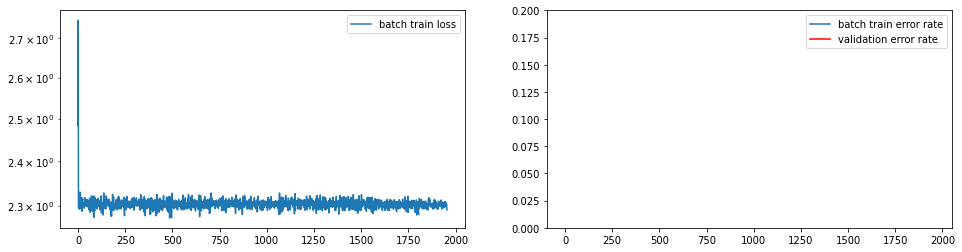

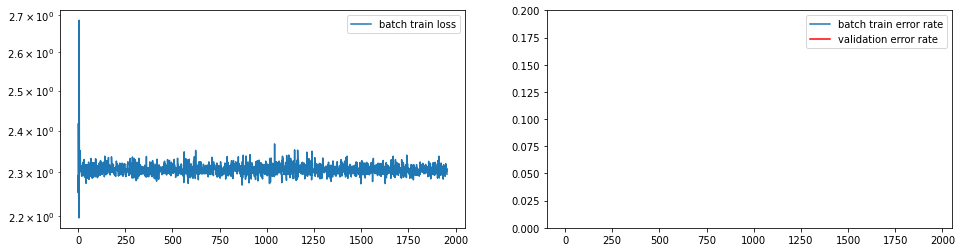

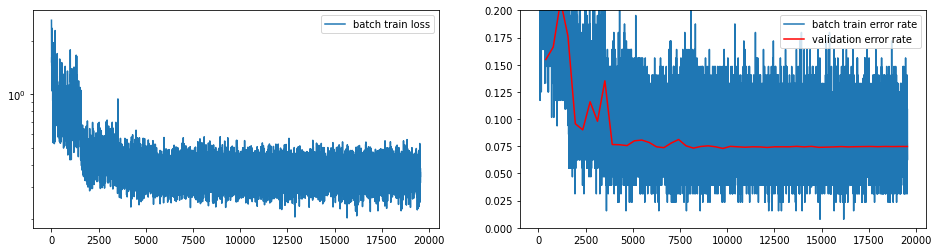

In [ ]:
best_params, history_of_params_and_scores = hyperparameter_tuner(
    mnist_loaders,
    num_of_trials=3,
    out_channels1=[1, 50], 
    out_channels2=[1, 50], 
    linear1=[1, 500], 
    linear2=[1, 100], 
    linear3=10,
    alpha=[0.001, 0.5],
    beta=[0.01, 0.99],
    epsilon=[0.01, 0.99],
    decay=[0.000001, 0.1],
    norm_constraint=None,
    polyak=None,
    num_epochs=5,
    max_num_epochs=50,
    patience_expansion=2.0,
    log_every=100,
    device="cuda")
# print("History of params and their scores:")
# print(history_of_params_and_scores)
# print("Best params and corresponding score:")
# print(best_params)
best_params, history_of_params_and_scores

----------------------------------------------------------
After epoch 37 | valid err rate:  1.72% | doing  37 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 18)

-------------------------------------------
Test error rate: 1.750%, training took 69s.
-------------------------------------------


({'alpha': 0.045036700525028346,
  'beta': 0.2806904055650635,
  'decay': 0.0004336391399946938,
  'epsilon': 0.30690789079081343,
  'norm_constraint': None,
  'polyak': None,
  'score': 0.0119},
 [{'alpha': 0.045036700525028346,
   'beta': 0.2806904055650635,
   'decay': 0.0004336391399946938,
   'epsilon': 0.30690789079081343,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.0119},
  {'alpha': 0.4829944176497701,
   'beta': 0.9557013427538327,
   'decay': 0.0008705537478152476,
   'epsilon': 0.679242584415573,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.8865},
  {'alpha': 0.00920893204194878,
   'beta': 0.34622783849757793,
   'decay': 0.00017005008882742175,
   'epsilon': 0.7681758900759351,
   'norm_constraint': None,
   'polyak': None,
   'score': 0.0175}])

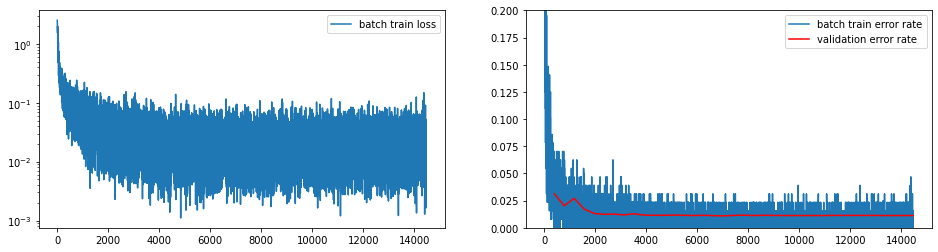

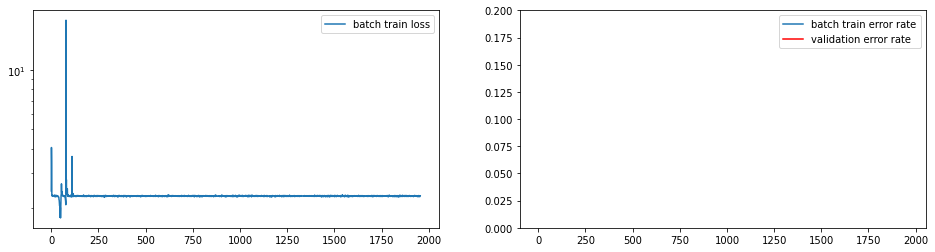

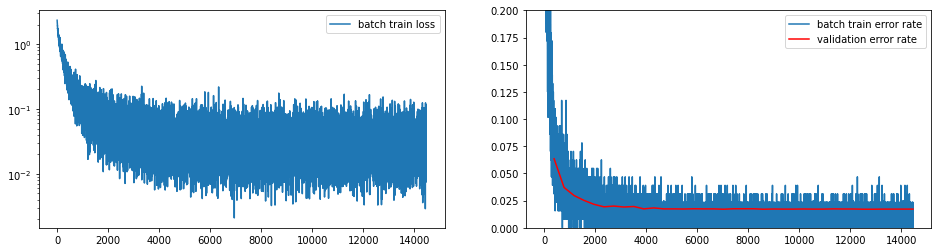

In [ ]:
best_params, history_of_params_and_scores = hyperparameter_tuner(
    mnist_loaders,
    num_of_trials=3,
    out_channels1=[1, 50], 
    out_channels2=[1, 50], 
    linear1=[1, 500], 
    linear2=[1, 100], 
    linear3=10,
    alpha=[0.001, 0.5],
    beta=[0.01, 0.99],
    epsilon=[0.01, 0.99],
    decay=[0.000001, 0.001],
    norm_constraint=None,
    polyak=None,
    num_epochs=5,
    max_num_epochs=50,
    patience_expansion=2.0,
    log_every=100,
    device="cuda")
# print("History of params and their scores:")
# print(history_of_params_and_scores)
# print("Best params and corresponding score:")
# print(best_params)
best_params, history_of_params_and_scores

----------------------------------------------------------
After epoch  5 | valid err rate: 89.36% | doing   5 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 1)

-------------------------------------------
Test error rate: 88.650%, training took 9s.
-------------------------------------------


({'alpha': 0.25644602250474124,
  'beta': 0.36054101285586226,
  'decay': 0.0001130807583111627,
  'epsilon': 0.19647078817647134,
  'linear1': 286,
  'linear2': 44,
  'linear3': 10,
  'norm_constraint': None,
  'out_channels1': 14,
  'out_channels2': 23,
  'polyak': None,
  'score': 0.0072},
 [{'alpha': 0.09738052011066035,
   'beta': 0.8464977105168212,
   'decay': 0.000561907986844211,
   'epsilon': 0.3473207679339223,
   'linear1': 198,
   'linear2': 67,
   'linear3': 10,
   'norm_constraint': None,
   'out_channels1': 19,
   'out_channels2': 19,
   'polyak': None,
   'score': 0.0082},
  {'alpha': 0.3929065533786032,
   'beta': 0.2944549433635833,
   'decay': 8.287121591680657e-05,
   'epsilon': 0.40947343022944077,
   'linear1': 226,
   'linear2': 99,
   'linear3': 10,
   'norm_constraint': None,
   'out_channels1': 8,
   'out_channels2': 43,
   'polyak': None,
   'score': 0.0105},
  {'alpha': 0.23561248450722427,
   'beta': 0.7131075368438559,
   'decay': 0.00036651198407818334,


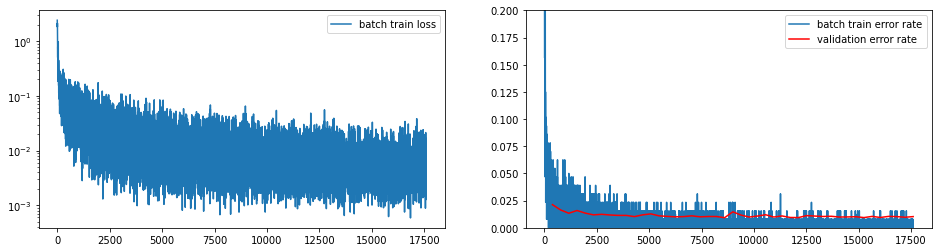

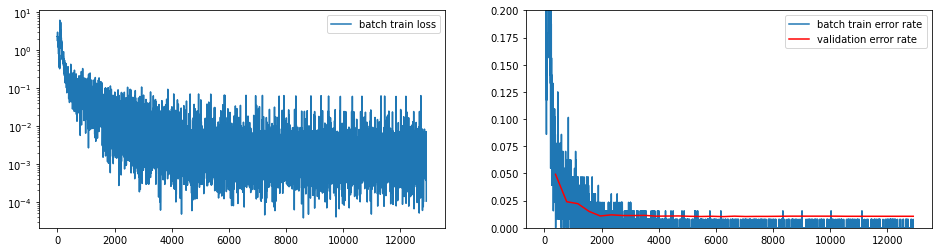

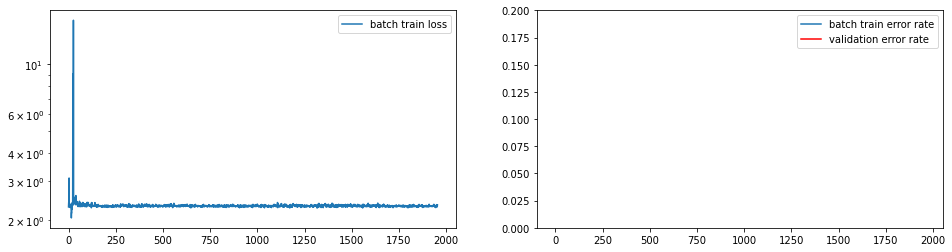

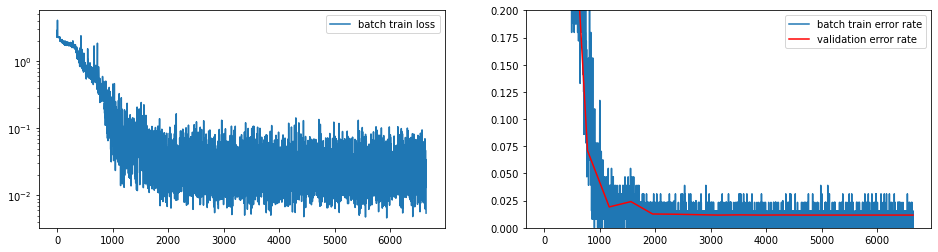

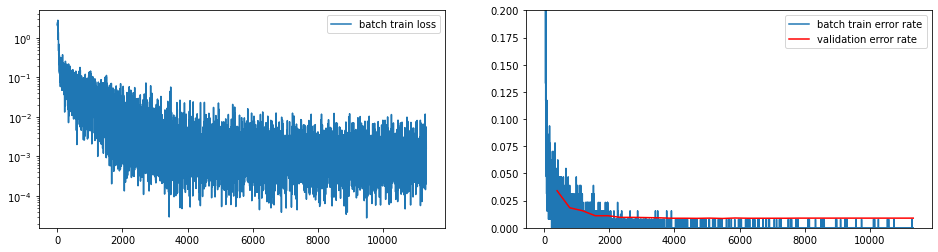

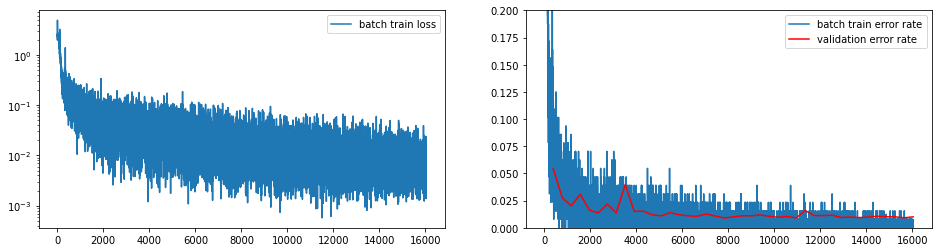

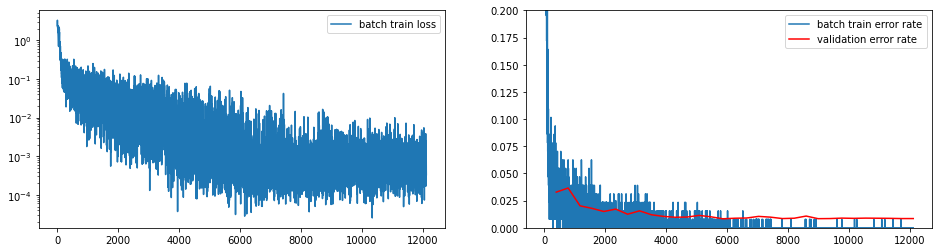

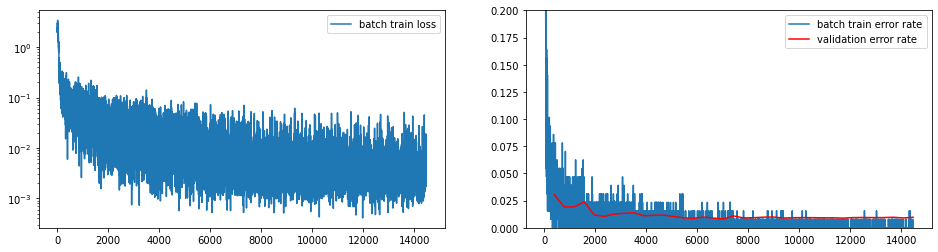

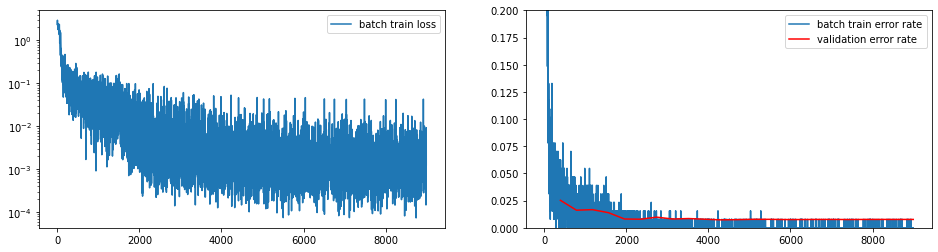

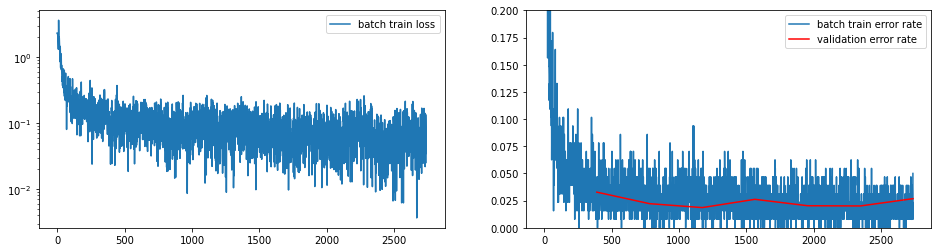

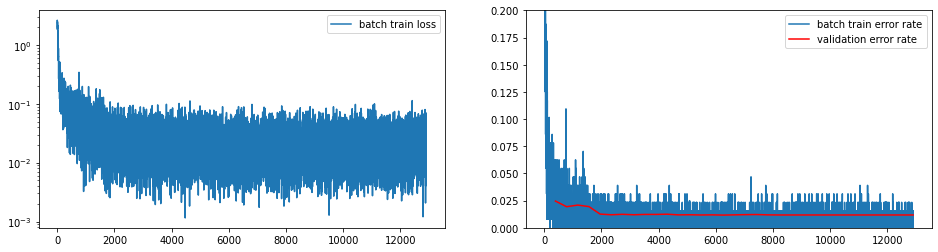

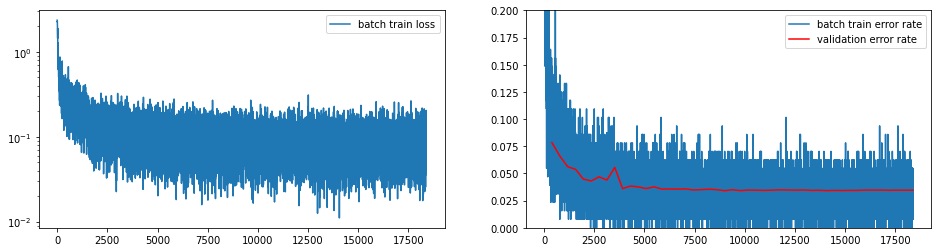

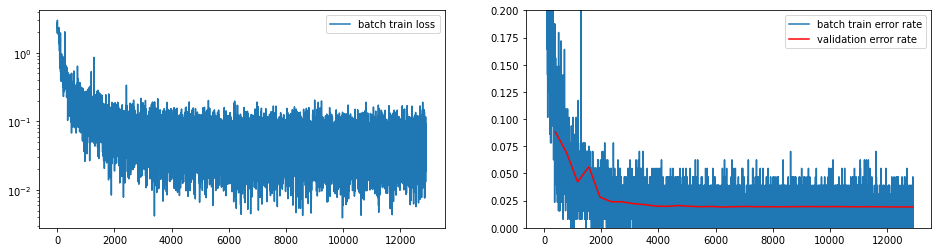

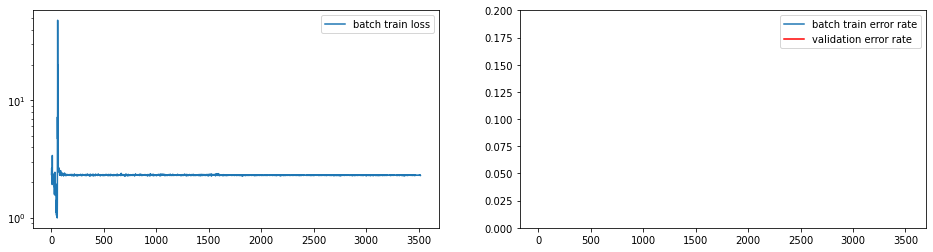

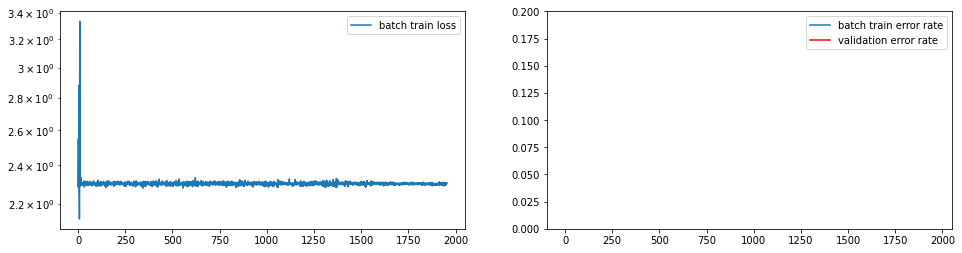

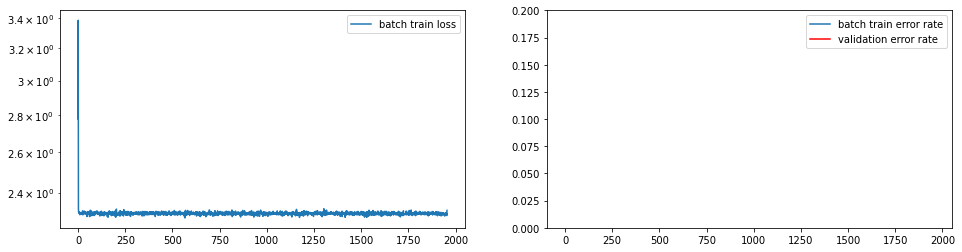

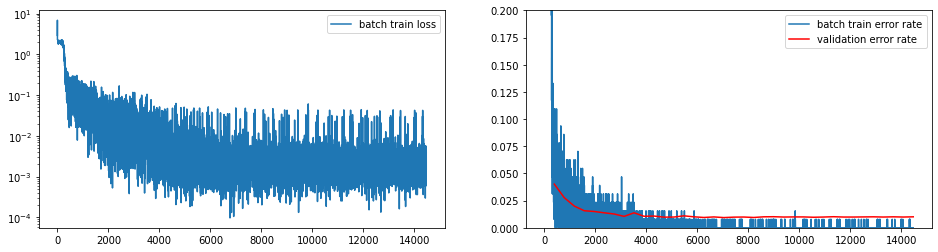

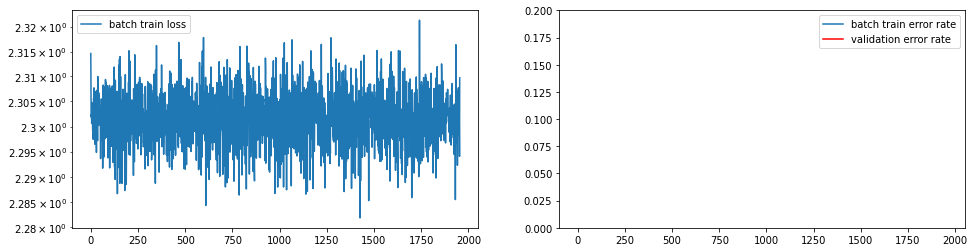

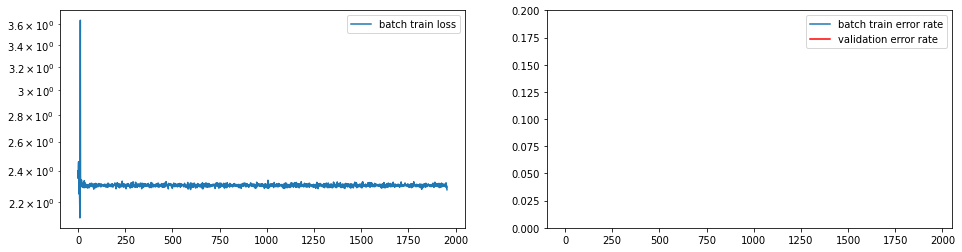

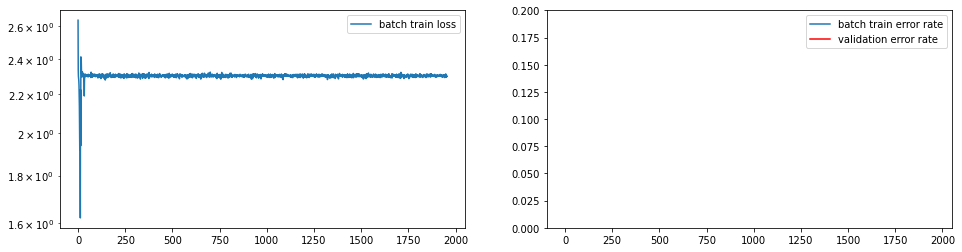

In [ ]:
best_params, history_of_params_and_scores = hyperparameter_tuner(
    mnist_loaders,
    num_of_trials=20,
    out_channels1=[1, 50], 
    out_channels2=[1, 50], 
    linear1=[1, 500], 
    linear2=[1, 100], 
    linear3=10,
    alpha=[0.001, 0.5],
    beta=[0.01, 0.99],
    epsilon=[0.01, 0.99],
    decay=[0.000001, 0.001],
    norm_constraint=None,
    polyak=None,
    num_epochs=5,
    max_num_epochs=50,
    patience_expansion=2.0,
    log_every=100,
    device="cuda")
# print("History of params and their scores:")
# print(history_of_params_and_scores)
# print("Best params and corresponding score:")
# print(best_params)
best_params, history_of_params_and_scores

----------------------------------------------------------
After epoch  9 | valid err rate: 90.39% | doing   9 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 4)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


--------------------------------------------
Test error rate: 89.720%, training took 22s.
--------------------------------------------


{'alpha': 0.22320765888032335,
 'beta': 0.9428560451864461,
 'decay': 9.689783555620173e-05,
 'epsilon': 0.13389326728548204,
 'linear1': 475,
 'linear2': 42,
 'linear3': 10,
 'norm_constraint': None,
 'out_channels1': 18,
 'out_channels2': 28,
 'polyak': None,
 'score': 0.0071}

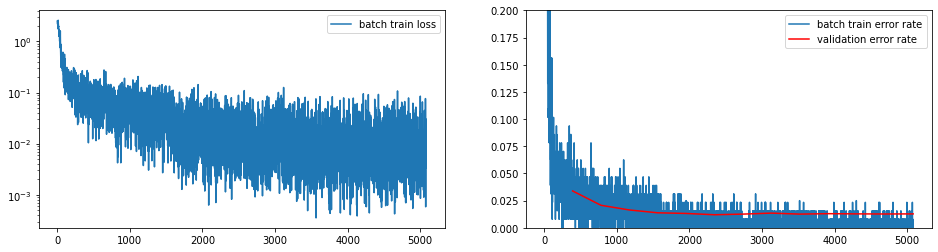

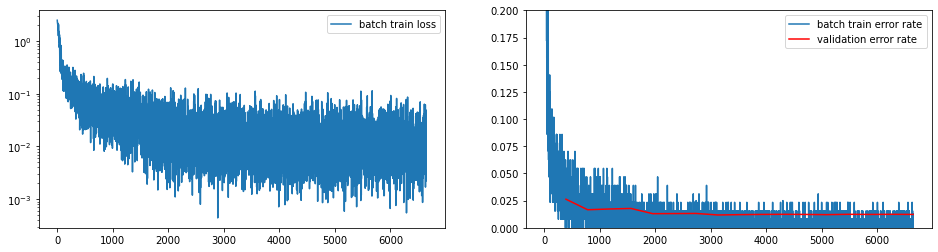

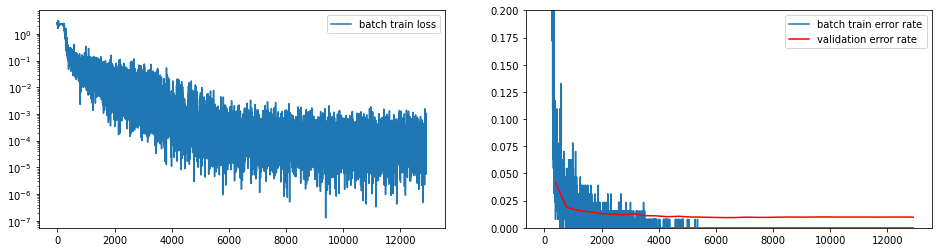

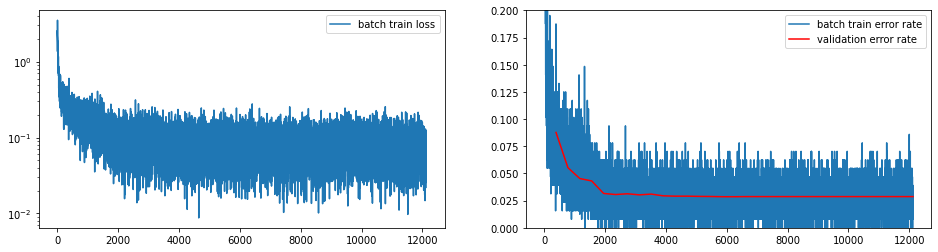

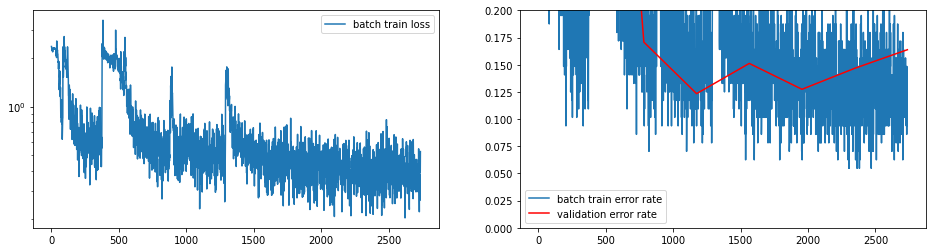

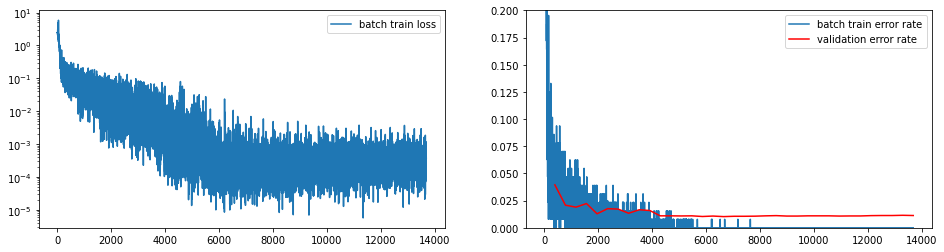

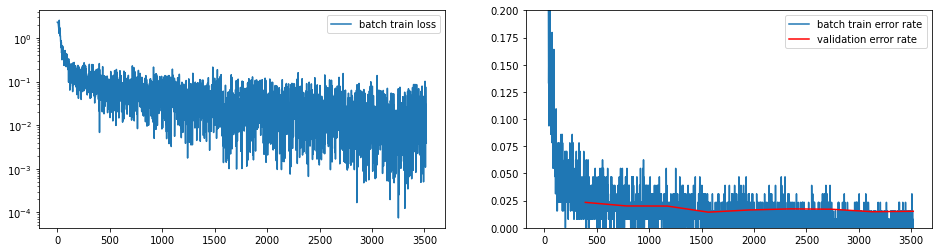

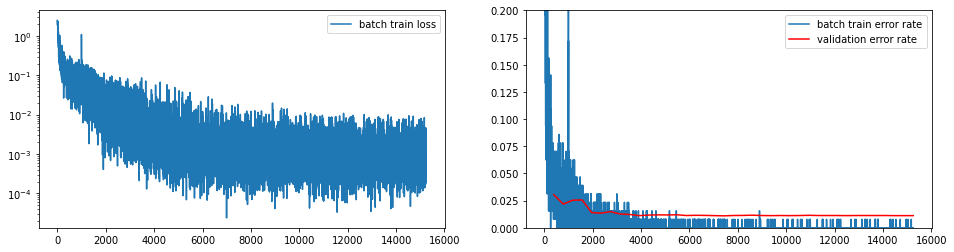

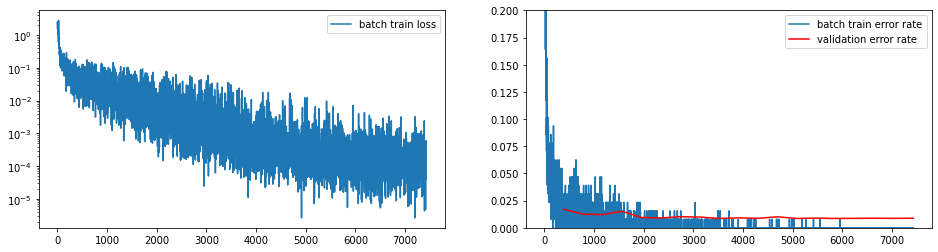

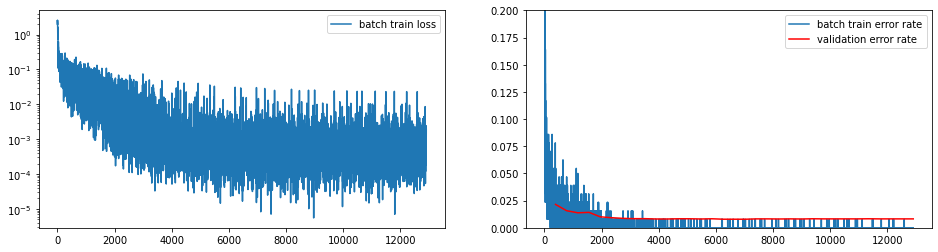

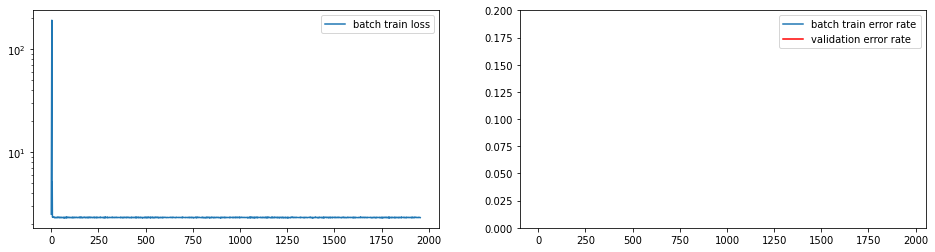

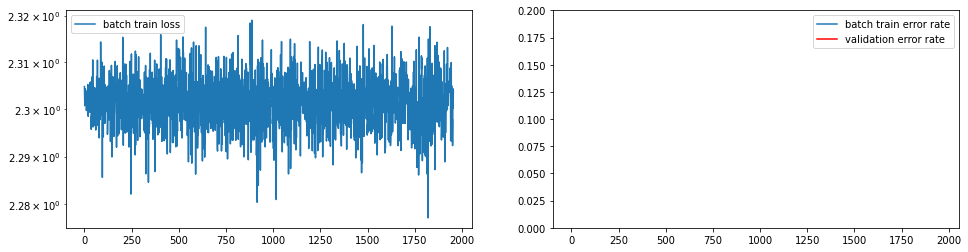

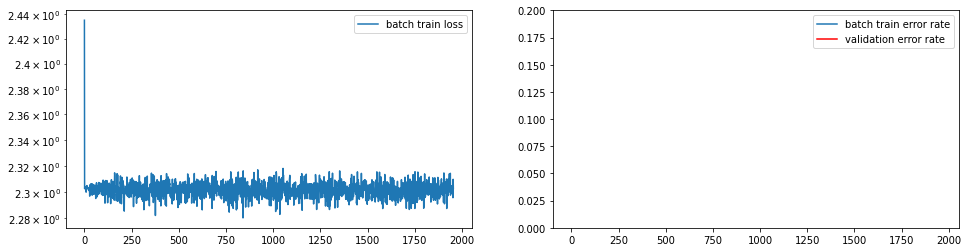

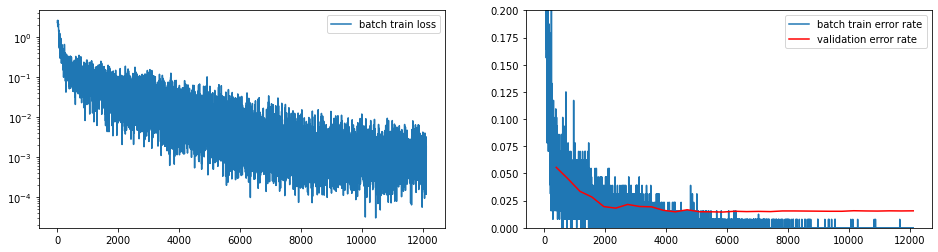

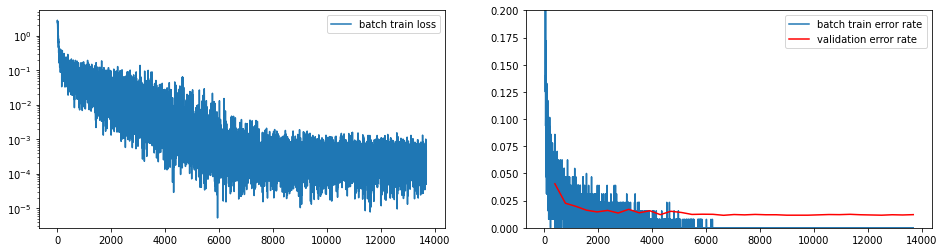

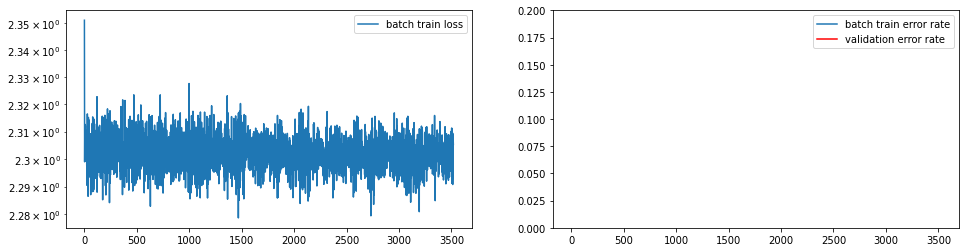

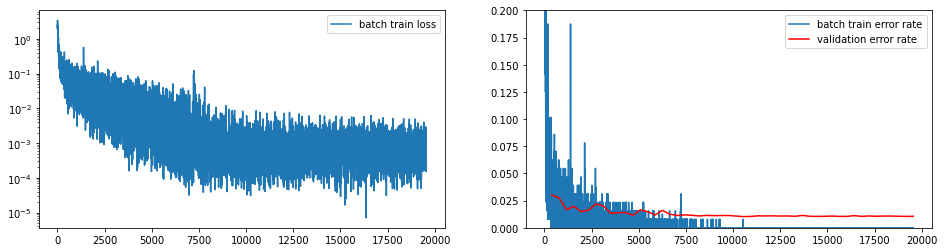

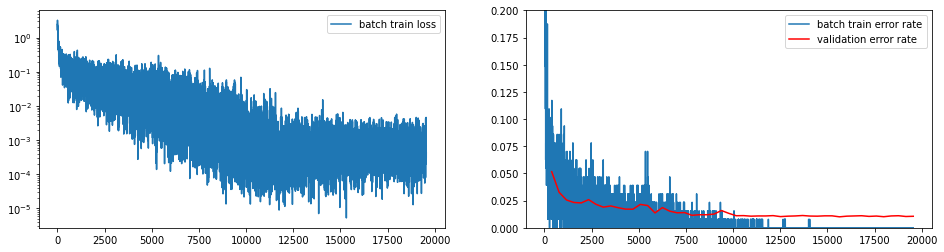

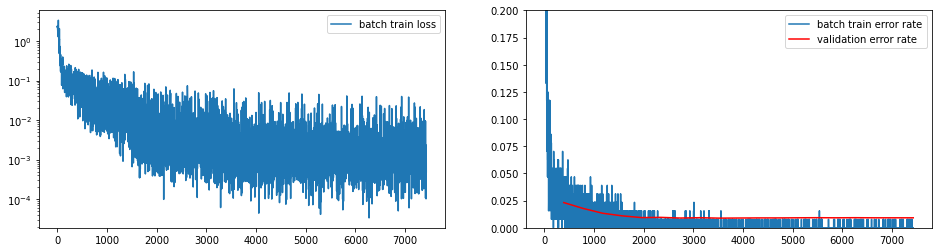

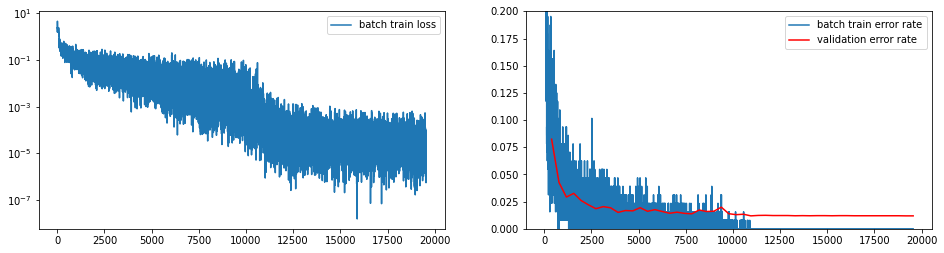

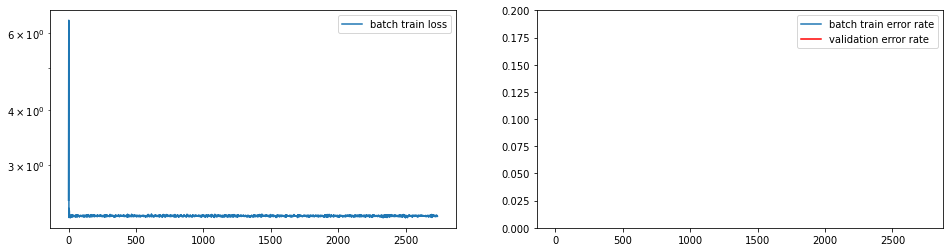

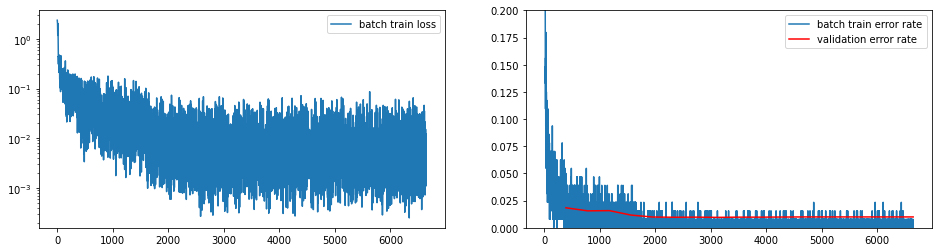

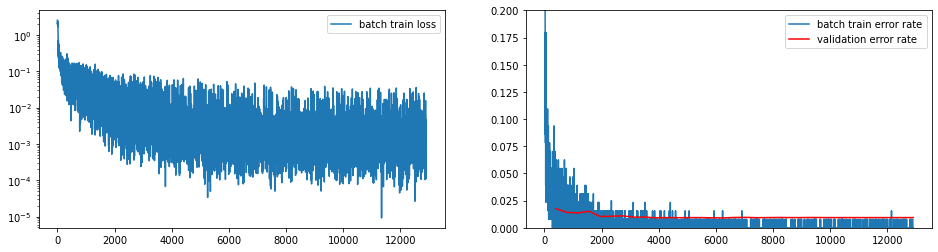

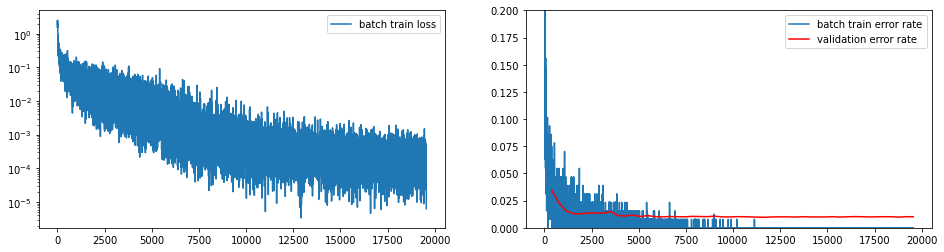

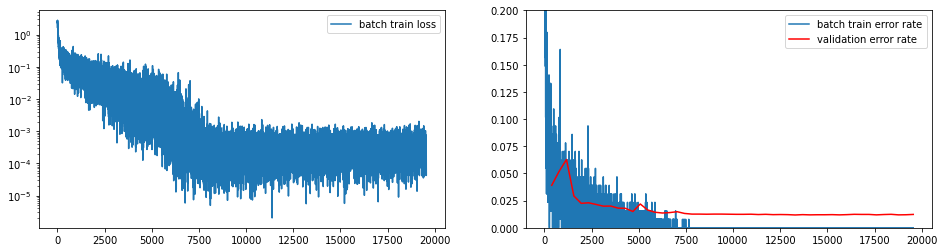

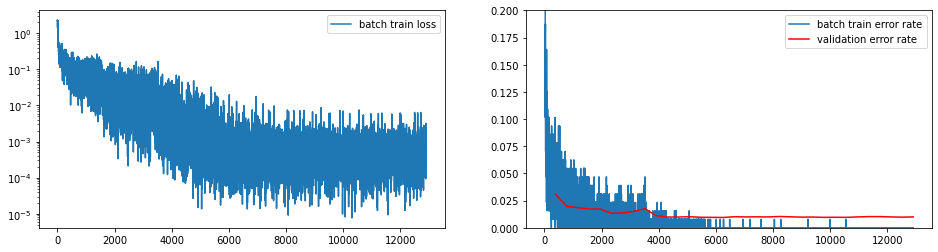

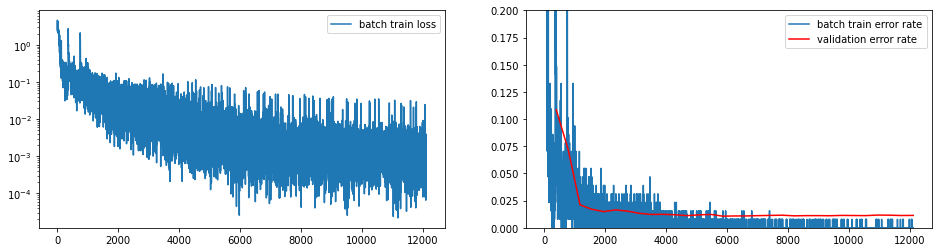

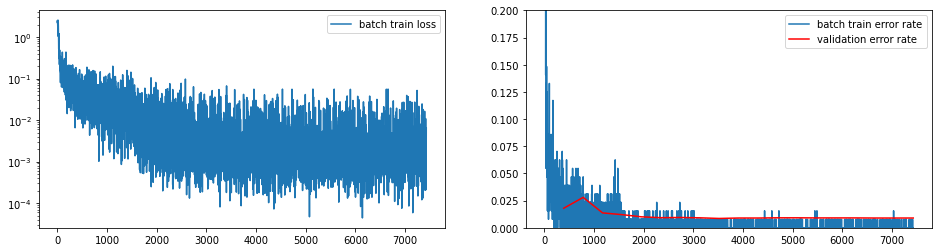

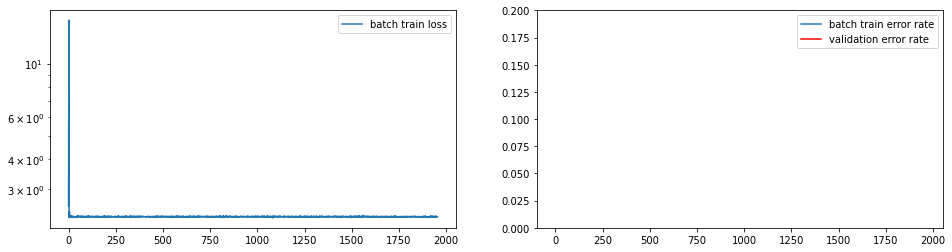

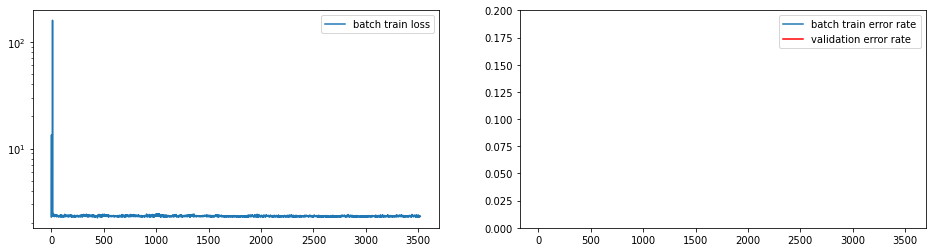

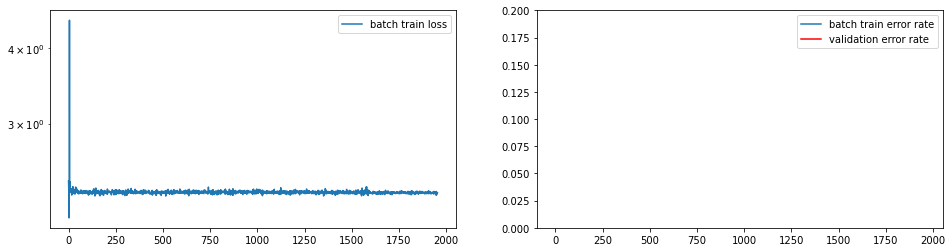

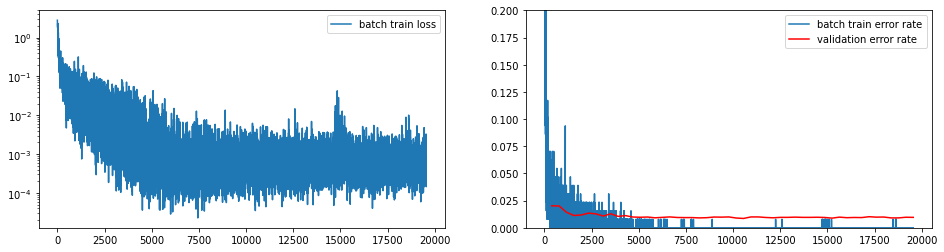

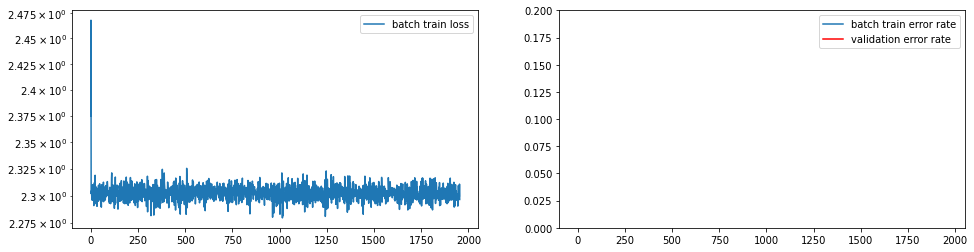

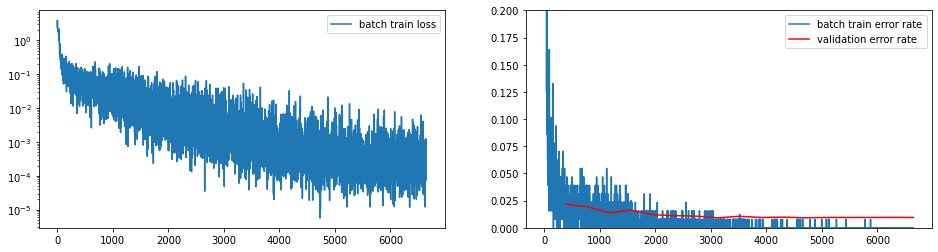

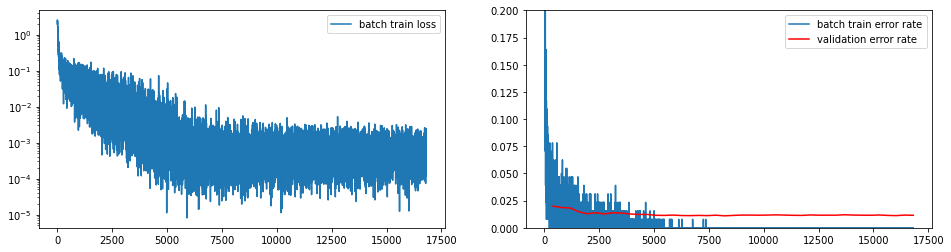

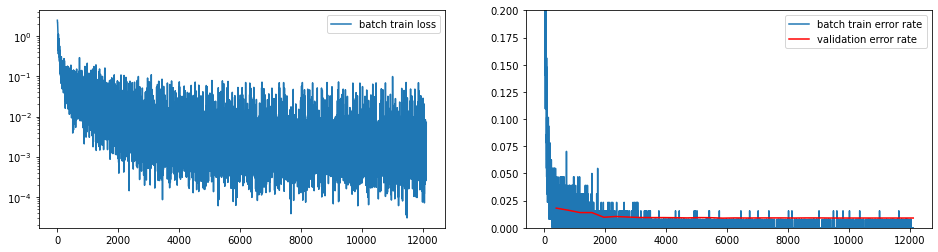

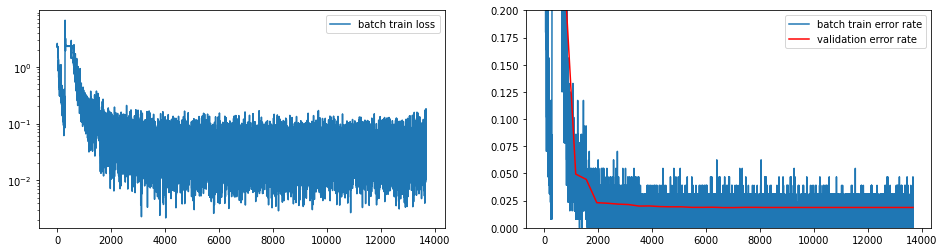

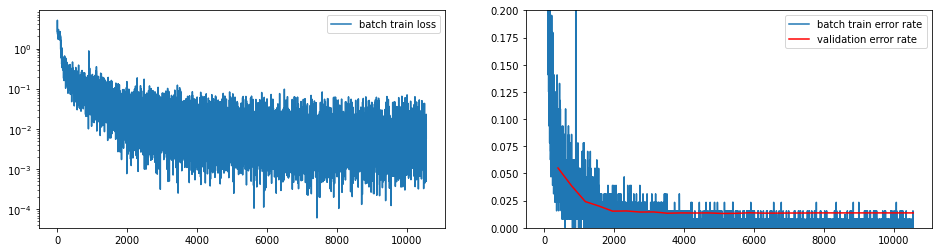

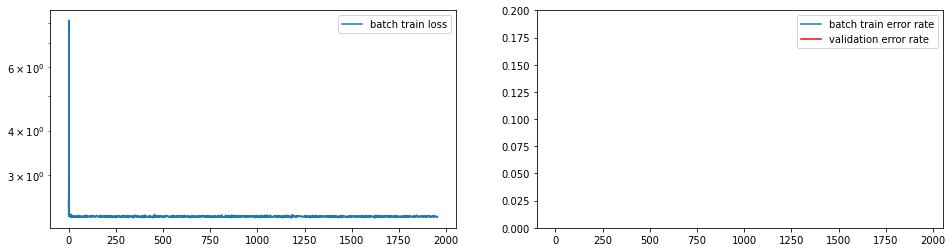

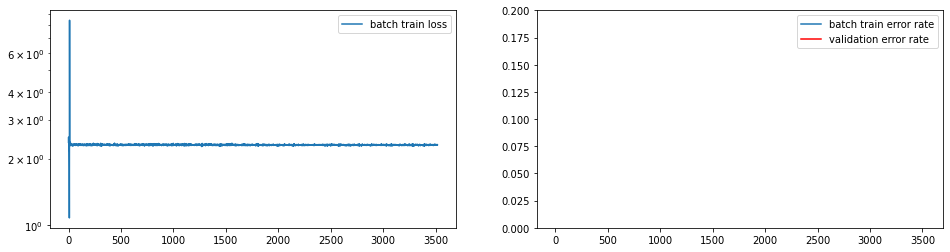

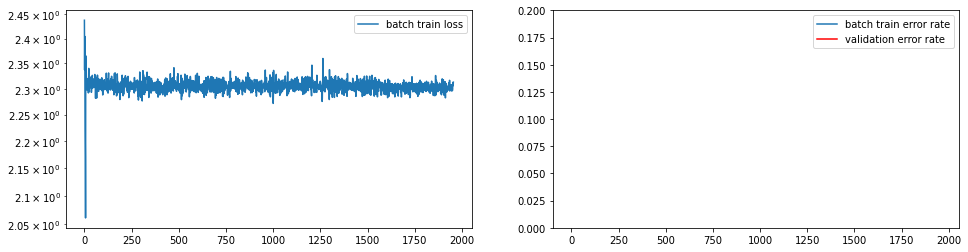

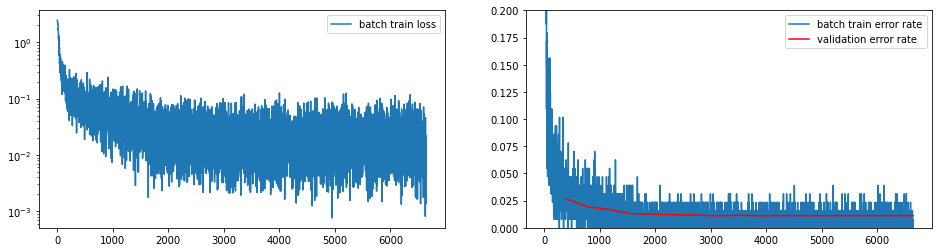

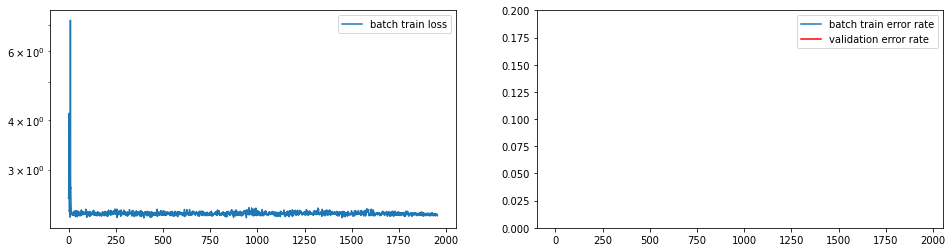

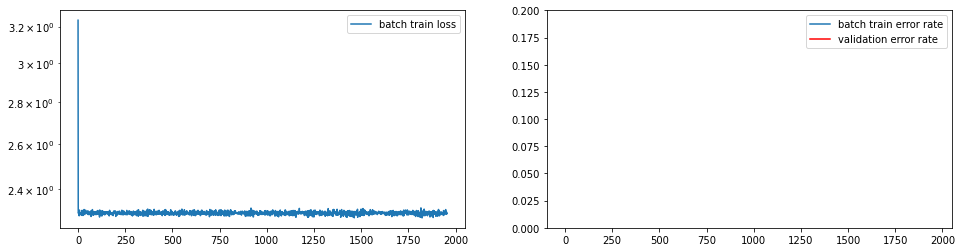

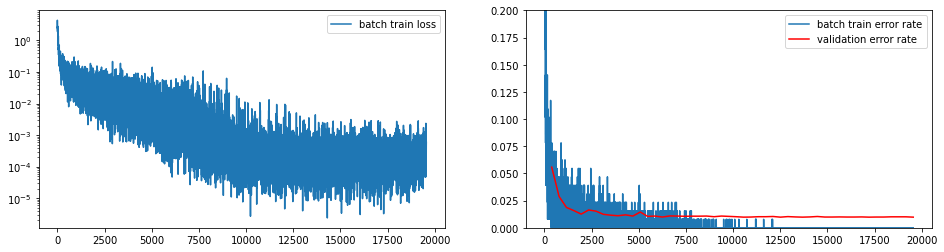

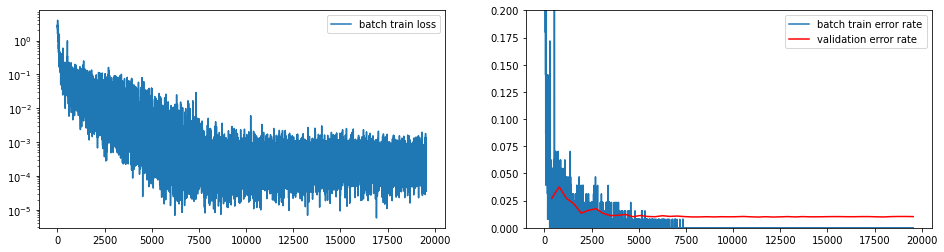

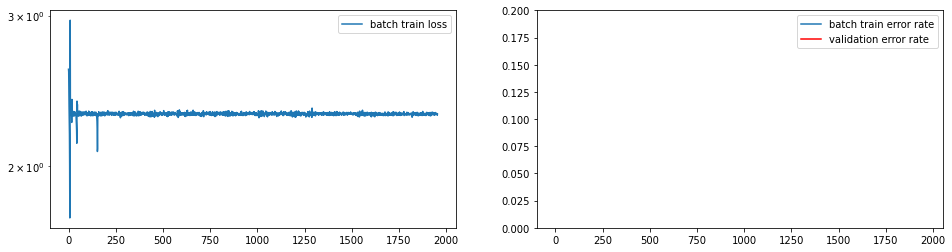

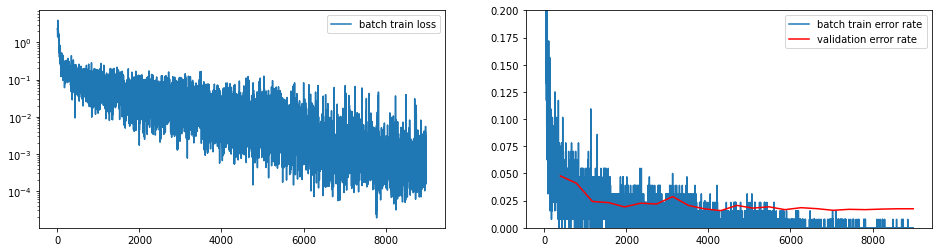

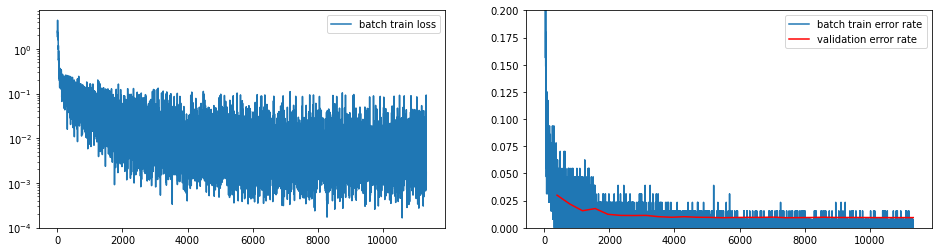

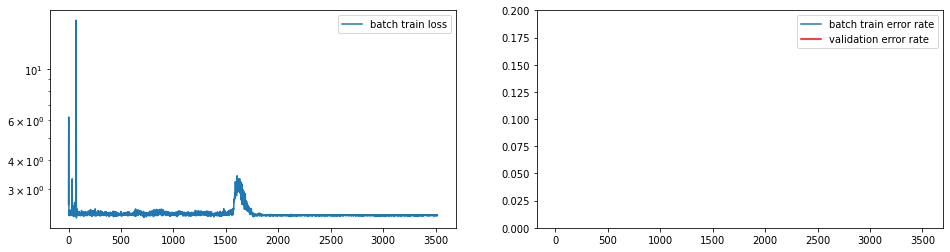

In [ ]:
best_params, history_of_params_and_scores = hyperparameter_tuner(
    mnist_loaders,
    num_of_trials=50,
    out_channels1=[1, 50], 
    out_channels2=[1, 50], 
    linear1=[1, 500], 
    linear2=[1, 100], 
    linear3=10,
    alpha=[0.001, 0.5],
    beta=[0.01, 0.99],
    epsilon=[0.01, 0.99],
    decay=[0.000001, 0.0001],
    norm_constraint=None,
    polyak=None,
    num_epochs=5,
    max_num_epochs=50,
    patience_expansion=2.0,
    log_every=100,
    device="cuda")
# print("History of params and their scores:")
# print(history_of_params_and_scores)
# print("Best params and corresponding score:")
# print(best_params)
best_params

Najlepszy zbiór parametrów:
{'alpha': 0.22320765888032335,
 'beta': 0.9428560451864461,
 'decay': 9.689783555620173e-05,
 'epsilon': 0.13389326728548204,
 'linear1': 475,
 'linear2': 42,
 'linear3': 10,
 'norm_constraint': None,
 'out_channels1': 18,
 'out_channels2': 28,
 'polyak': None,
 'score': 0.0071}.
 Błąd 0.71%

## Problem 11: Pruning [1p] - Solution

In [ ]:
def SGD_keep_zeroed(
    model,
    data_loaders,
    zeroed,
    alpha=1e-4,
    beta=0.9,
    epsilon=0.0,
    decay=0.0,
    norm_constraint=None,
    polyak=None,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
):

    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    #
    # TODO for Problem 1.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    #
    velocities = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    polyak_weights = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    #
    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("Interrupt at any time to evaluate the best validation model so far.")
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            #
            # alpha = alpha * beta
            if epoch % 5 == 0:
              alpha = alpha * beta
            
            for x, y in data_loaders["train"]:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for (name, p), v, polyak_weight, zeroed_p in \
                            zip(model.named_parameters(), velocities, polyak_weights, zeroed):
                        if "weight" in name:
                            #
                            # TODO for Problem 1.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            # p.grad += TODO
                            #
                            # p.grad += 2 * decay * p.data
                             p.grad += 2 * decay * p

                        #
                        # TODO for Problem 1.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        # alpha = TODO
                        #
                        # if iter_ % 10000 == 0:
                        #     alpha = alpha * beta


                        #
                        # TODO for Problem 1.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        #

                        #
                        # TODO for Problem 1.1: Implement velocity updates for momentum
                        # lease make sure to modify the contents of v, not the v pointer!!!
                        #
                        # v[...] = TODO
                        # v.data = epsilon * v.data - alpha * p.grad 
                        v[...] = epsilon * v[...] - alpha * p.grad

                        #
                        # TODO for Problem 1: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        #
                        # p -= alpha * p.grad
                        # p.data = p.data + v.data
                        if "weight" in name:
                            p += v[...] * torch.logical_not(zeroed_p[...])
                        else:
                            p += v[...]

                        # Problem 9: Polyak Averaging
                        if polyak is not None:
                            polyak_weight[...] = polyak * polyak_weight[...] + (1 - polyak) * p[...]

                        # Problem 8: Norm Constraints
                        if norm_constraint is not None:
                            if "weight" in name:
                                # Wektor d x 1
                                # print("p:", p)
                                # p_old = p * 1
                                # print(p.shape)
                                weight_norm = (p**2).sum(axis=1, keepdim=True).sqrt()
                                # print("weight_norm:", weight_norm)
                                p[...] = p[...] * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                        p[...] * (weight_norm <= norm_constraint) 
                                # p = p * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                #     p * (weight_norm <= norm_constraint)
                                # print("p:", p)

                        # Zero gradients for the next iteration
                        p.grad.zero_()

                if iter_ % log_every == 0:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    # Problem 9: Polyak Averaging
    if polyak is not None:
        print("\nLoading params from Polyak Averaging\n")
        with torch.no_grad():
            for param, polyak_weight in zip(model.parameters(), polyak_weights):
                param[...] = polyak_weight

    elif best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    plot_history(history)

In [ ]:
def pruning(
    model,
    data_loaders,
    num_of_iters=None,
    zero_tollerance=1e-4,
    alpha=1e-4,
    beta=0.9,
    epsilon=0.0,
    decay=0.0,
    norm_constraint=None,
    polyak=None,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
):
    model.train()
    model.to(device)
    t_start = time.time()
    SGD(
        model,
        mnist_loaders,
        alpha=alpha,
        beta=beta,
        epsilon=epsilon,
        decay=decay,
        norm_constraint=norm_constraint,
        polyak=polyak,
        num_epochs=num_epochs,
        max_num_epochs=max_num_epochs,
        patience_expansion=patience_expansion,
        log_every=log_every,
        device=device,
    )
    model.eval()
    test_err_rate = compute_error_rate(model, mnist_loaders["test"])
    m = (
        f"Test error rate before pruning: {test_err_rate * 100.0:.3f}%, "
        f"training took {time.time() - t_start:.0f}s."
    )
    print("{0}\n{1}\n{0}".format("-" * len(m), m))

    zeroed = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    # new_zeroed = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    number_of_zeroed = []

    model.to(device)
    # Set "zeroed" and zero the "zeroed" parameters
    num = 0
    with torch.no_grad():
        for (name, p), zeroed_p in \
                zip(model.named_parameters(), zeroed):
            if "weight" in name:
                zeroed_p[...] = torch.abs(p[...]) < zero_tollerance
                num += torch.sum(zeroed_p)
                p[...] *= torch.logical_not(zeroed_p[...])
    number_of_zeroed.append(num)

    if num_of_iters is None:
        num_of_iters = 1000


    for i in range(num_of_iters):
        model.train()
        t_start = time.time()
        SGD_keep_zeroed(
            model,
            mnist_loaders,
            zeroed,
            alpha=alpha,
            beta=beta,
            epsilon=epsilon,
            decay=decay,
            norm_constraint=norm_constraint,
            polyak=polyak,
            num_epochs=num_epochs,
            max_num_epochs=max_num_epochs,
            patience_expansion=patience_expansion,
            log_every=log_every,
            device=device,
        )

        model.to(device)
        # Generate new_zeroed mask
        num = 0
        with torch.no_grad():
            for (name, p), zeroed_p in \
                    zip(model.named_parameters(), zeroed):
                if "weight" in name:
                    zeroed_p[...] = torch.abs(p[...]) < zero_tollerance
                    num += torch.sum(zeroed_p)
        number_of_zeroed.append(num)

        model.eval()
        test_err_rate = compute_error_rate(model, mnist_loaders["test"])
        m = (
            f"Test error rate after {i+1} pruning: {test_err_rate * 100.0:.3f}%, "
            f"training took {time.time() - t_start:.0f}s."
        )
        print("{0}\n{1}\n{0}".format("-" * len(m), m))

        # No new zeroed parameter -> end pruning
        if number_of_zeroed[-1] == number_of_zeroed[-2]:
            print(f"No changes! Pruning ended after {i+1} iterations.")
            return number_of_zeroed

        model.to(device)
        # Zero the "zeroed" parameters
        with torch.no_grad():
            for (name, p), zeroed_p in \
                    zip(model.named_parameters(), zeroed):
                if "weight" in name:
                    p[...] *= torch.logical_not(zeroed_p[...])
    return number_of_zeroed

In [ ]:
{'alpha': 0.22320765888032335,
 'beta': 0.9428560451864461,
 'decay': 9.689783555620173e-05,
 'epsilon': 0.13389326728548204,
 'linear1': 475,
 'linear2': 42,
 'linear3': 10,
 'norm_constraint': None,
 'out_channels1': 18,
 'out_channels2': 28,
 'polyak': None,
 'score': 0.0071}

In [ ]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

----------------------------------------------------------
After epoch 23 | valid err rate:  0.99% | doing  23 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 15)

-----------------------------------------------------------
Test error rate after 7 pruning: 0.850%, training took 34s.
-----------------------------------------------------------


[tensor(121382., device='cuda:0'),
 tensor(140345., device='cuda:0'),
 tensor(142914., device='cuda:0'),
 tensor(145332., device='cuda:0'),
 tensor(147848., device='cuda:0'),
 tensor(150389., device='cuda:0'),
 tensor(169572., device='cuda:0'),
 tensor(210834., device='cuda:0')]

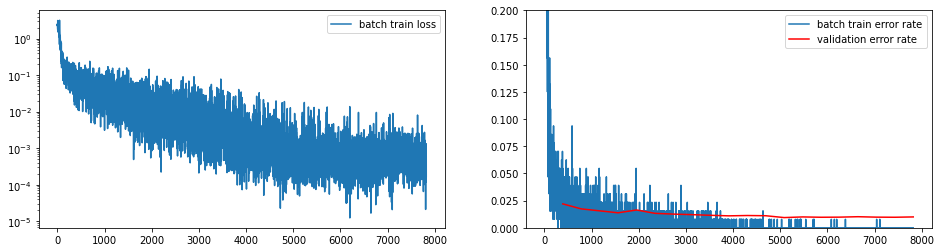

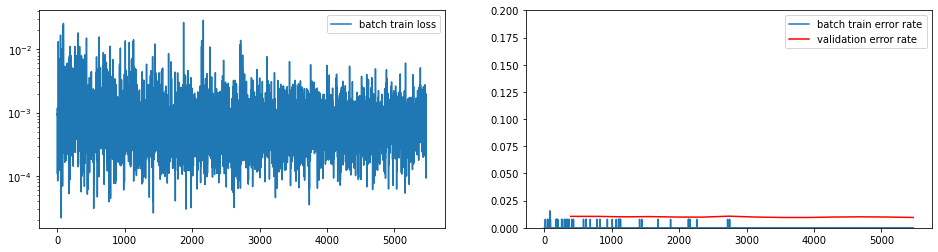

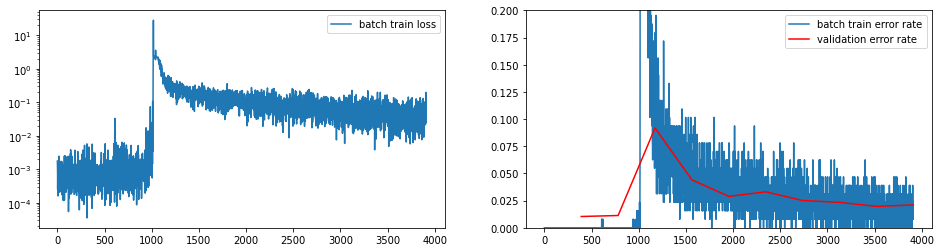

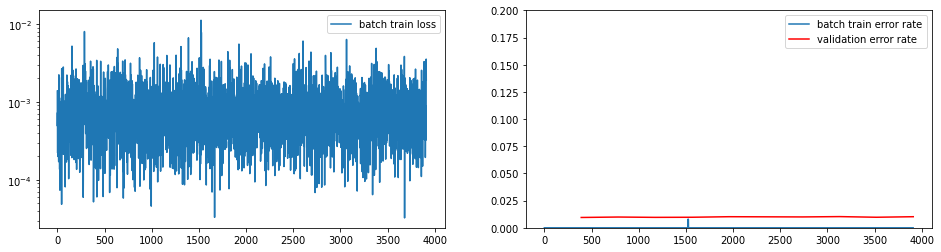

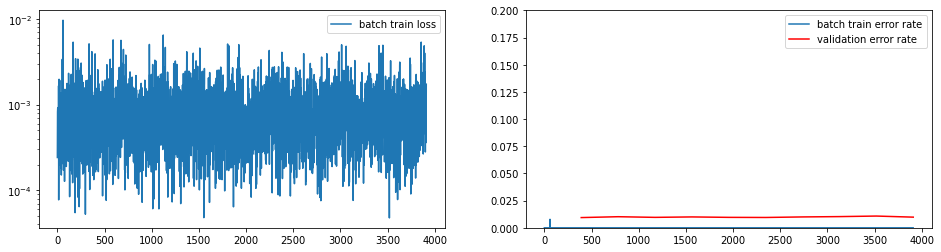

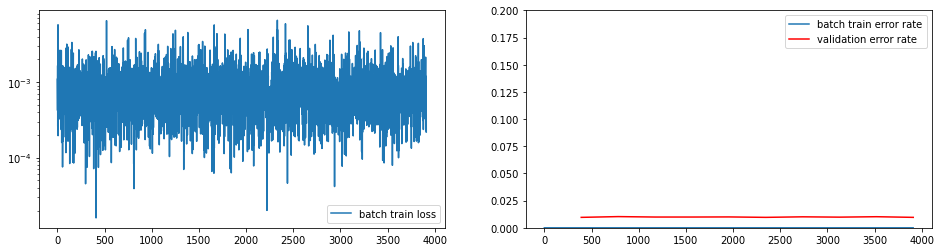

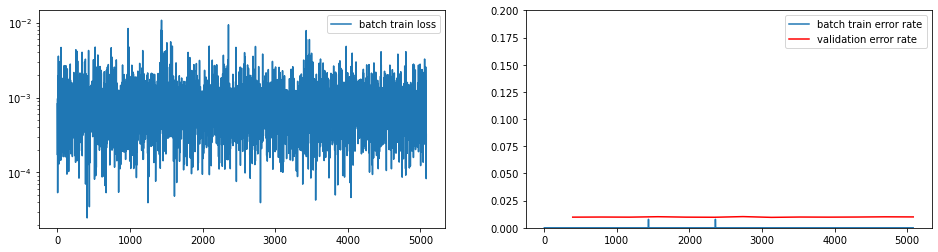

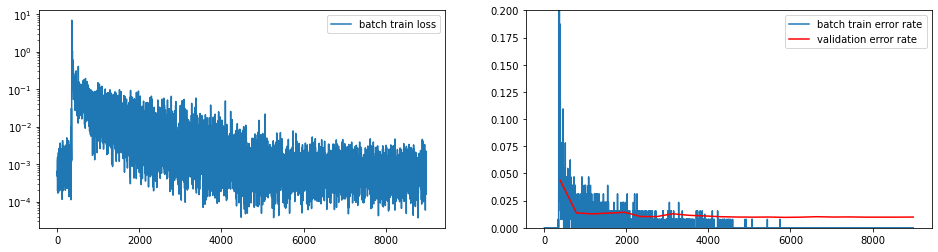

In [ ]:
class TunableConvNet(nn.Module):
    def __init__(self, out_channels1=6, out_channels2=16, linear1=120, linear2=84, linear3=10):
        super(TunableConvNet, self).__init__()
        # image size = 28 x 28
        size1 = out_channels1
        size2 = out_channels2
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                            stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        # self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                            stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), linear1)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(linear1, linear2)
        self.fc3 = nn.Linear(linear2, linear3)

    def forward(self, x):
        # print(x.shape)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = TunableConvNet(out_channels1=18, out_channels2=28, linear1=475, linear2=42, linear3=10)

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'

pruning(
    model,
    mnist_loaders,
    num_of_iters=7,
    zero_tollerance=0.02,
    alpha=0.22320765888032335,
    beta=0.828560451864461,
    epsilon=0.13389326728548204,
    decay=9.689783555620173e-05,
    norm_constraint=None,
    polyak=None,
    num_epochs=10,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

In [ ]:
get_n_params(model)

358141

Jak rozumiem chodziło o próbę usunięcia jak największej liczby wag przy zachowaniu dokładności modelu niegorszej niż 0.1% względem najlepszego modelu? W powyższym przykładzie udało się usunąć 210834 z 358141 wag, a błąd wzrósł z 0.77% do 0.86%. Poniżej implementacja wykorzystująca biblioteczny pruning, który pozwala na usunięcie wybranego procentu wag (zamiast ustawiania tresholda jak w powyżej).

In [ ]:
def SGD_keep_zeroed(
    model,
    data_loaders,
    parameters_to_prune,
    alpha=1e-4,
    beta=0.9,
    epsilon=0.0,
    decay=0.0,
    norm_constraint=None,
    polyak=None,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
    ):

    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    #
    # TODO for Problem 1.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    #
    velocities = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    polyak_weights = [torch.zeros_like(p.data, device=device, requires_grad=False) for p in model.parameters()]
    non_zeroed = {name[:-5]: t.clone().to(device) for name, t in list(model.named_buffers())}
    # for x in velocities:
    #     print(x.shape)
    # for x in non_zeroed:
    #     print(x.shape)
    for module, name in parameters_to_prune:
        prune.remove(module, 'weight')
    #
    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("Interrupt at any time to evaluate the best validation model so far.")
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            #
            # alpha = alpha * beta
            if epoch % 5 == 0:
              alpha = alpha * beta
            
            for x, y in data_loaders["train"]:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for (name, p), v, polyak_weight in \
                            zip(model.named_parameters(), velocities, polyak_weights):
                        if "weight" in name:
                            #
                            # TODO for Problem 1.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            # p.grad += TODO
                            #
                            # p.grad += 2 * decay * p.data
                             p.grad += 2 * decay * p

                        #
                        # TODO for Problem 1.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        # alpha = TODO
                        #
                        # if iter_ % 10000 == 0:
                        #     alpha = alpha * beta


                        #
                        # TODO for Problem 1.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        #

                        #
                        # TODO for Problem 1.1: Implement velocity updates for momentum
                        # lease make sure to modify the contents of v, not the v pointer!!!
                        #
                        # v[...] = TODO
                        # v.data = epsilon * v.data - alpha * p.grad 
                        v[...] = epsilon * v[...] - alpha * p.grad

                        #
                        # TODO for Problem 1: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        #
                        # p -= alpha * p.grad
                        # p.data = p.data + v.data
                        if "weight" in name:
                            p += v[...] * non_zeroed[name]
                        else:
                            p += v[...]

                        # Problem 9: Polyak Averaging
                        if polyak is not None:
                            polyak_weight[...] = polyak * polyak_weight[...] + (1 - polyak) * p[...]

                        # Problem 8: Norm Constraints
                        if norm_constraint is not None:
                            if "weight" in name:
                                # Wektor d x 1
                                # print("p:", p)
                                # p_old = p * 1
                                # print(p.shape)
                                weight_norm = (p**2).sum(axis=1, keepdim=True).sqrt()
                                # print("weight_norm:", weight_norm)
                                p[...] = p[...] * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                        p[...] * (weight_norm <= norm_constraint) 
                                # p = p * (weight_norm > norm_constraint) * (norm_constraint / weight_norm) + \
                                #     p * (weight_norm <= norm_constraint)
                                # print("p:", p)

                        # Zero gradients for the next iteration
                        p.grad.zero_()

                if iter_ % log_every == 0:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    # Problem 9: Polyak Averaging
    if polyak is not None:
        print("\nLoading params from Polyak Averaging\n")
        with torch.no_grad():
            for param, polyak_weight in zip(model.parameters(), polyak_weights):
                param[...] = polyak_weight

    elif best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    plot_history(history)

In [ ]:
def pruning(
    model,
    data_loaders,
    parameters_to_prune,
    num_of_iters=None,
    pruning_starting_fraction=0.1,
    expanding_sparcity=0.05,
    alpha=1e-4,
    beta=0.9,
    epsilon=0.0,
    decay=0.0,
    norm_constraint=None,
    polyak=None,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
    ):

    model.train()
    model.to(device)
    t_start = time.time()
    SGD(
        model,
        mnist_loaders,
        alpha=alpha,
        beta=beta,
        epsilon=epsilon,
        decay=decay,
        norm_constraint=norm_constraint,
        polyak=polyak,
        num_epochs=num_epochs,
        max_num_epochs=max_num_epochs,
        patience_expansion=patience_expansion,
        log_every=log_every,
        device=device,
    )
    model.eval()
    test_err_rate = compute_error_rate(model, mnist_loaders["test"])
    m = (
        f"Test error rate before pruning: {test_err_rate * 100.0:.3f}%, "
        f"training took {time.time() - t_start:.0f}s."
    )
    print("{0}\n{1}\n{0}".format("-" * len(m), m))

    best_val_err = np.inf

    if num_of_iters is None:
        num_of_iters = 10


    for i in range(num_of_iters):
        model.train()
        t_start = time.time()

        prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=pruning_starting_fraction + i * expanding_sparcity,
        )

        SGD_keep_zeroed(
            model,
            mnist_loaders,
            parameters_to_prune,
            alpha=alpha,
            beta=beta,
            epsilon=epsilon,
            decay=decay,
            norm_constraint=norm_constraint,
            polyak=polyak,
            num_epochs=num_epochs,
            max_num_epochs=max_num_epochs,
            patience_expansion=patience_expansion,
            log_every=log_every,
            device=device,
        )

        model.to(device)

        model.eval()
        test_err_rate = compute_error_rate(model, mnist_loaders["test"])
        m = (
            f"Test error rate after {i+1} pruning: {test_err_rate * 100.0:.3f}%, "
            f"training took {time.time() - t_start:.0f}s."
        )
        print("{0}\n{1}\n{0}".format("-" * len(m), m))
        
        val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
        with torch.no_grad():
            if test_err_rate < best_val_err:
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]

    with torch.no_grad():
        for param, best_param in zip(model.parameters(), best_params):
            param[...] = best_param

----------------------------------------------------------
After epoch 15 | valid err rate:  0.77% | doing  15 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 1)

-----------------------------------------------------------
Test error rate after 8 pruning: 0.860%, training took 59s.
-----------------------------------------------------------


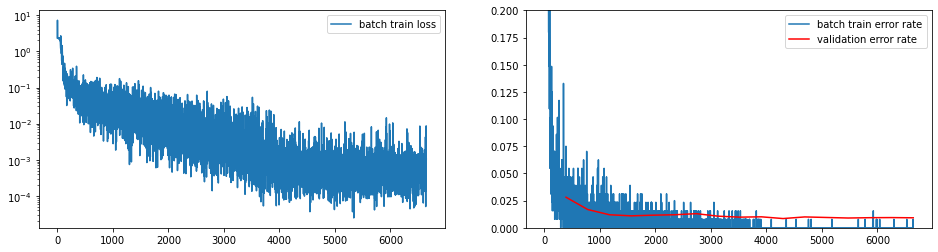

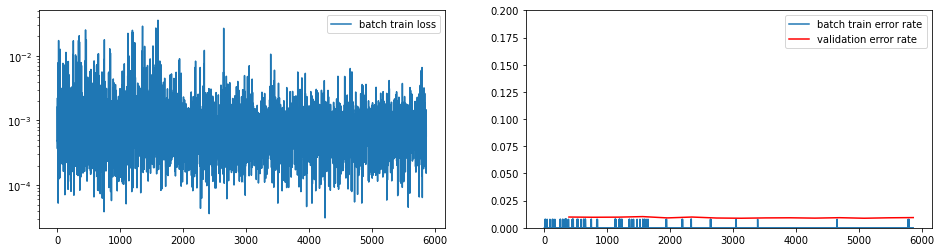

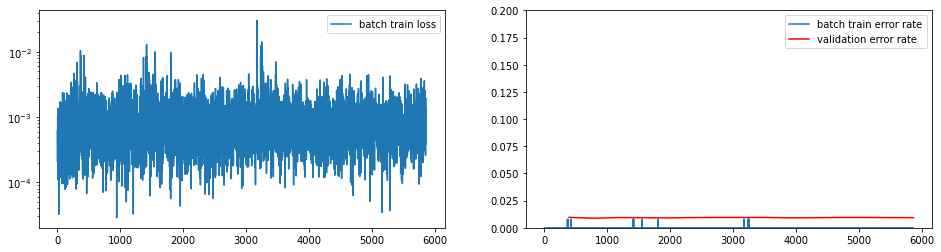

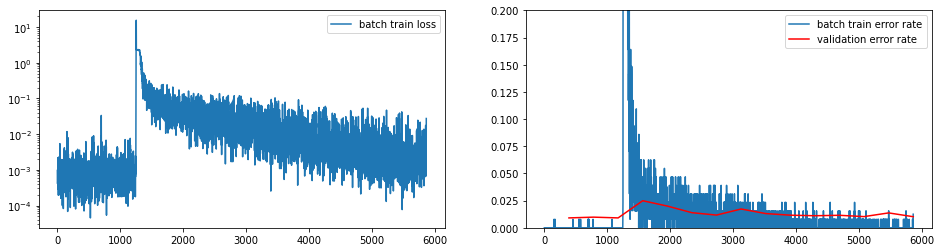

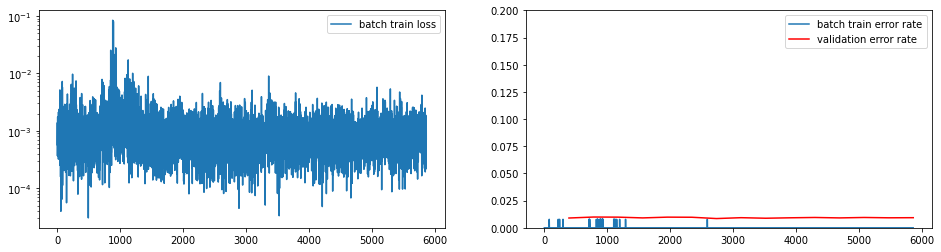

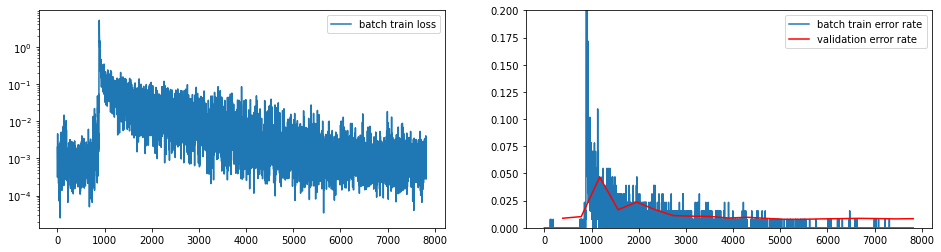

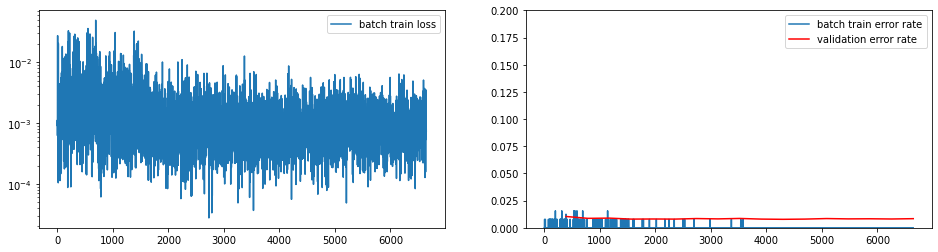

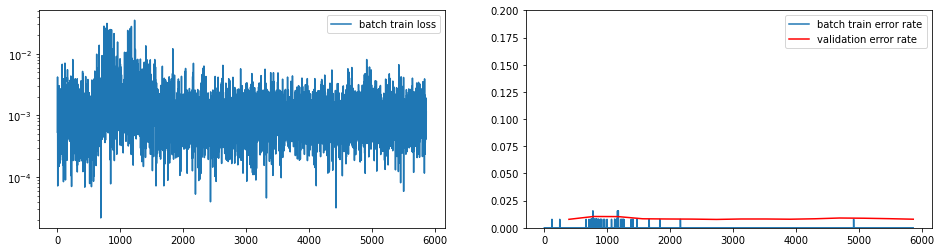

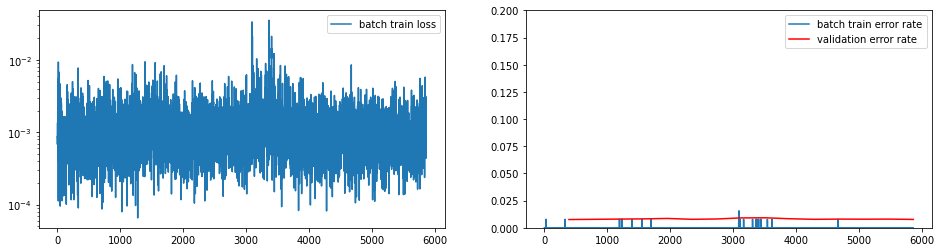

In [ ]:
class TunableConvNet(nn.Module):
    def __init__(self, out_channels1=6, out_channels2=16, linear1=120, linear2=84, linear3=10):
        super(TunableConvNet, self).__init__()
        # image size = 28 x 28
        size1 = out_channels1
        size2 = out_channels2
        kernel_size = 3
        padding = 0
        stride = 1
        dilation = 1
        pooling_size = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=size1, kernel_size=kernel_size, 
                            stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (28 + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        # self.pool = nn.MaxPool2d(pooling_size, pooling_size)
        output_size = output_size // 2
        self.conv2 = nn.Conv2d(in_channels=size1, out_channels=size2, kernel_size=kernel_size,
                            stride=stride, padding=padding, dilation=dilation, padding_mode='zeros')
        output_size = (output_size + 2 * padding - dilation * (kernel_size-1) - 1) / stride + 1
        output_size = output_size // 2
        # print(output_size)
        self.fc1 = nn.Linear(int (size2 * output_size * output_size), linear1)
        # self.fc1 = nn.Linear(size2 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(linear1, linear2)
        self.fc3 = nn.Linear(linear2, linear3)

    def forward(self, x):
        # print(x.shape)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        # print(x.shape)
        # x = x.view(self.num_flat_features(x), -1)
        x = x.reshape(x.size(0), -1)
        # print(x.shape)
        # print(self.fc1.weight.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = TunableConvNet(out_channels1=50, out_channels2=80, linear1=2000, linear2=1000, linear3=10)

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            if "fc" in name:
                # p.normal_(0.0, 0.5)
                nn.init.kaiming_normal_(p)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'

parameters_to_prune = (
    (model.conv1, 'weight'),
    (model.conv2, 'weight'),
    (model.fc1, 'weight'),
    (model.fc2, 'weight'),
    (model.fc3, 'weight'),
)

pruning(
    model,
    mnist_loaders,
    parameters_to_prune,
    num_of_iters=8,
    pruning_starting_fraction=0.3,
    expanding_sparcity=0.05,
    alpha=0.22320765888032335,
    beta=0.828560451864461,
    epsilon=0.13389326728548204,
    decay=9.689783555620173e-05,
    norm_constraint=None,
    polyak=None,
    num_epochs=15,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cuda",
)

## Problem 12: Extreme Learning Machine (ELM) [2p] - Solution

In [ ]:
class ExtremeLearningModel(nn.Module):
    def __init__(self, layer_size, hidden_activation_function):
        super(ExtremeLearningModel, self).__init__()
        self.first_layer = nn.Linear(28*28, layer_size)
        self.second_layer = nn.Linear(layer_size, 10)
        self.hidden_activation_function = hidden_activation_function

    def forward(self, X):
        X = X.view(X.size(0), -1)
        x = self.hidden_activation_function(self.first_layer(X))
        x = self.second_layer(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

def to_onehot(batch_size, num_classes, y, device):
    y_onehot = torch.FloatTensor(batch_size, num_classes).to(device)
    #y = y.type(dtype=torch.long)
    y = torch.unsqueeze(y, dim=1)
    y_onehot.zero_()
    y_onehot.scatter_(1, y, 1)
    return y_onehot


def train_extreme_learning_machine(layer_size, parameter_initialization_function, hidden_activation_function, 
                                   train, data_loaders, device="cpu"):
    model = ExtremeLearningModel(layer_size, hidden_activation_function)
    with torch.no_grad():
        parameter_initialization_function(model)
        # model.to(device)
        # X = (train.data / 255).to(device)
        X = (train.data / 255)
        # y = train.targets.reshape(-1, 1).to(device).type(torch.FloatTensor)
        # y = train.targets.reshape(-1, 1).type(torch.FloatTensor)
        y = to_onehot(train.targets.shape[0], 10, train.targets, device)
        # print(y.shape, y.dtype, X.shape, X.dtype)
        X = X.view(X.size(0), -1)
        X = model.first_layer(X)
        X = model.hidden_activation_function(X)
        # theta, _ = torch.solve(X.T @ y, X.T @ X)
        theta = (torch.pinverse(X) @ y).T
        model.second_layer.weight.data = theta.data
        val_err_rate = compute_error_rate(model, data_loaders["valid"], device=device)
    return model, val_err_rate

In [ ]:
def init1(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                nn.init.kaiming_normal_(p, mode='fan_in')
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init2(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                nn.init.kaiming_normal_(p, mode='fan_out', nonlinearity='leaky_relu')
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init3(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init4(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                nn.init.kaiming_normal_(p, mode='fan_out', nonlinearity='relu')
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init5(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                torch.nn.init.xavier_uniform_(p)
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init6(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                torch.nn.init.xavier_normal_(p)
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.01)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init7(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                torch.nn.init.xavier_normal_(p)
            elif "bias" in name:
                if "first_layer" in name:
                    p.normal_(0.0, 0.05)
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

def init8(model):
    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "weight" in name:
                torch.nn.init.xavier_normal_(p)
            elif "bias" in name:
                if "first_layer" in name:
                    p.zero_()
                else:
                    p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init1, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

# _train = torchvision.datasets.MNIST(
# data_path, train=True, download=True, transform=transform
# )
# _train.data = _train.data[:50000]
# _train.targets = _train.targets[:50000]

--------------------------------
Validation error rate: 10.110%, 
--------------------------------
--------------------------
Test error rate: 11.270%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(4000, init1, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.930%, 
-------------------------------
-------------------------
Test error rate: 9.590%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init1, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 7.220%, 
-------------------------------
-------------------------
Test error rate: 7.370%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init1, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 7.100%, 
-------------------------------
-------------------------
Test error rate: 7.550%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2000, init1, lambda x: F.leaky_relu(x, negative_slope=0.02), 
                                                     _train, mnist_loaders)
m =(
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.350%, 
--------------------------------
--------------------------
Test error rate: 10.990%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init1, F.hardtanh, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 45.490%, 
--------------------------------
--------------------------
Test error rate: 47.150%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init1, F.hardswish, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 21.280%, 
--------------------------------
--------------------------
Test error rate: 22.600%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init1, F.relu6, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.990%, 
--------------------------------
--------------------------
Test error rate: 11.870%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init1, F.elu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 28.240%, 
--------------------------------
--------------------------
Test error rate: 29.500%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init2, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.440%, 
-------------------------------
-------------------------
Test error rate: 8.840%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(4000, init2, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 12.330%, 
--------------------------------
--------------------------
Test error rate: 12.410%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1200, init2, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.930%, 
-------------------------------
-------------------------
Test error rate: 9.730%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2000, init2, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.990%, 
-------------------------------
-------------------------
Test error rate: 8.680%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init2, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.430%, 
-------------------------------
-------------------------
Test error rate: 8.850%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2000, init2, lambda x: F.leaky_relu(x, negative_slope=0.02), 
                                                     _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.150%, 
-------------------------------
-------------------------
Test error rate: 8.510%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init3, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 9.840%, 
-------------------------------
-------------------------
Test error rate: 9.760%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init3, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 9.090%, 
-------------------------------
-------------------------
Test error rate: 9.600%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2000, init3, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 7.950%, 
-------------------------------
-------------------------
Test error rate: 8.510%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(3000, init3, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.150%, 
--------------------------------
--------------------------
Test error rate: 10.720%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init3, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.290%, 
-------------------------------
-------------------------
Test error rate: 9.020%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2000, init3, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.780%, 
-------------------------------
-------------------------
Test error rate: 8.780%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1000, init4, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 11.180%, 
--------------------------------
--------------------------
Test error rate: 11.560%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init4, F.relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 11.910%, 
--------------------------------
--------------------------
Test error rate: 12.830%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init5, F.hardtanh, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 88.680%, 
--------------------------------
--------------------------
Test error rate: 88.400%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init5, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.340%, 
--------------------------------
--------------------------
Test error rate: 10.570%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(2500, init5, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.190%, 
-------------------------------
-------------------------
Test error rate: 8.720%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(3000, init5, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 6.700%, 
-------------------------------
-------------------------
Test error rate: 6.980%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(4000, init5, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 7.040%, 
-------------------------------
-------------------------
Test error rate: 7.380%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init5, F.tanh, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


--------------------------------
Validation error rate: 37.630%, 
--------------------------------
--------------------------
Test error rate: 36.590%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(3000, init5, F.leaky_relu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.300%, 
--------------------------------
--------------------------
Test error rate: 10.740%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init5, F.sigmoid, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


--------------------------------
Validation error rate: 82.290%, 
--------------------------------
--------------------------
Test error rate: 81.280%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init6, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.630%, 
-------------------------------
-------------------------
Test error rate: 9.110%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(3000, init6, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 8.010%, 
-------------------------------
-------------------------
Test error rate: 8.460%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(4000, init6, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 6.570%, 
-------------------------------
-------------------------
Test error rate: 6.730%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(5000, init6, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

-------------------------------
Validation error rate: 6.760%, 
-------------------------------
-------------------------
Test error rate: 6.990%, 
-------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init6, F.sigmoid, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


--------------------------------
Validation error rate: 61.650%, 
--------------------------------
--------------------------
Test error rate: 61.140%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init6, F.silu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 38.600%, 
--------------------------------
--------------------------
Test error rate: 40.240%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(3000, init6, F.silu, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 36.830%, 
--------------------------------
--------------------------
Test error rate: 37.670%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init7, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 11.780%, 
--------------------------------
--------------------------
Test error rate: 12.670%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init7, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 10.250%, 
--------------------------------
--------------------------
Test error rate: 10.350%, 
--------------------------


In [ ]:
model, val_err_rate = train_extreme_learning_machine(1500, init8, F.tanhshrink, _train, mnist_loaders)
m = (
    f"Validation error rate: {val_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

--------------------------------
Validation error rate: 12.580%, 
--------------------------------
--------------------------
Test error rate: 13.610%, 
--------------------------


Najlepszy wynik

Validation error rate: 6.570%, 

Test error rate: 6.730%, 

dla 4000 ukrytych neuronów, inicjalizacji wag 
    torch.nn.init.xavier_normal_(p)
i biasu
        p.normal_(0.0, 0.05), funkcja aktywacji
F.tanhshrink

## Random tests, don't check

In [ ]:
test = torch.rand((10))
print(test)
print(test.data)
print(torch.zeros_like(test, device="cuda"))
test.data = torch.ones_like(test)
print(test)

tensor([0.9394, 0.4973, 0.8698, 0.0739, 0.0043, 0.8041, 0.1749, 0.5674, 0.9904,
        0.0988])
tensor([0.9394, 0.4973, 0.8698, 0.0739, 0.0043, 0.8041, 0.1749, 0.5674, 0.9904,
        0.0988])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [ ]:
test = torch.rand((2))
test_external_grad = torch.tensor([1., 1.])
test.grad = test_external_grad
print(test.data, test.grad)
test += 10
print(test.data, test.grad)
test.data += 100
print(test.data, test.grad)
# test.backward(gradient=test_external_grad)

tensor([0.9287, 0.9432]) tensor([1., 1.])
tensor([10.9287, 10.9432]) tensor([1., 1.])
tensor([110.9287, 110.9432]) tensor([1., 1.])


In [ ]:
test_vs = [torch.zeros((2)), torch.ones((2))]
for v in test_vs:
    v.data += 1
print(test_vs)

[tensor([1., 1.]), tensor([2., 2.])]


In [ ]:
test = torch.rand((2))
test.zero_()
print(test)
test[...] += 1
print(test)

tensor([0., 0.])
tensor([1., 1.])


In [ ]:
torch.zeros((3,2)) - ((torch.ones((3,2))+1)**2).sum(axis=-1).reshape(-1, 1)

tensor([[-8., -8.],
        [-8., -8.],
        [-8., -8.]])

In [ ]:
((torch.ones((3,2))+1)**2).sum(axis=-1).reshape(-1, 1).sqrt()

tensor([[2.8284],
        [2.8284],
        [2.8284]])

In [ ]:
1 / ((torch.ones((3,2))+1)**2).sum(axis=-1).reshape(-1, 1)

tensor([[0.1250],
        [0.1250],
        [0.1250]])

In [ ]:
np.nan == np.nan

False

In [ ]:
((torch.ones((3,2))+1)**2).sum(axis=-1, keepdim=True)

tensor([[8.],
        [8.],
        [8.]])

In [ ]:
np.random.uniform(0.1, 0.1)

0.1

In [ ]:
(torch.zeros((3,2)) == 0) * torch.arange(6).reshape(3,2)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
all ([torch.zeros((2)), torch.ones((2))] == [torch.zeros((2)), torch.ones((2))])

RuntimeError: ignored

In [ ]:
if any(torch.ones((2)) == torch.ones((2))):
    print(True)

True


In [ ]:
v1 = torch.ones((2))
v2 = torch.zeros((2))
if any(v1 != v2):
    print(True)

True


In [ ]:
torch.sum(torch.arange(10).reshape((2,5)))

tensor(45)

In [ ]:
test_tensor = nn.Linear(28*28, 10)
test_random = torch.rand((50, 28, 28))
test_random = test_random.view(test_random.size(0), -1)
# print(y, y.dtype)
# print(X.shape, y.shape, model.first_layer.weight.data.shape)
test_random = test_tensor(test_random)
test_random = F.relu(test_random)
test_random

tensor([[0.0000e+00, 0.0000e+00, 3.0373e-01, 2.4909e-01, 2.0493e-01, 2.1460e-01,
         0.0000e+00, 8.9361e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 3.9165e-01, 7.3538e-01, 0.0000e+00, 0.0000e+00,
         2.7730e-01, 4.8564e-01, 0.0000e+00, 1.9054e-01],
        [0.0000e+00, 0.0000e+00, 1.4461e-01, 5.5763e-01, 1.3750e-01, 0.0000e+00,
         1.2884e-01, 8.4490e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8359e-01, 7.2740e-01, 4.4438e-02, 0.0000e+00,
         2.9674e-01, 6.3846e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3726e-01, 0.0000e+00, 0.0000e+00,
         4.2910e-03, 5.8169e-01, 0.0000e+00, 1.3373e-02],
        [0.0000e+00, 0.0000e+00, 3.8656e-02, 2.2185e-01, 8.3577e-02, 0.0000e+00,
         1.7124e-01, 8.8750e-01, 0.0000e+00, 1.2253e-01],
        [0.0000e+00, 0.0000e+00, 4.5889e-01, 2.0866e-01, 0.0000e+00, 0.0000e+00,
         1.2553e-01, 9.7307e-01, 0.0000e+00, 2.9444e-02],
        [0.0000e+00, 0.0000

In [ ]:
test_tensor.bias

Parameter containing:
tensor([-0.0212, -0.0231, -0.0084,  0.0194, -0.0142, -0.0342,  0.0194, -0.0153,
         0.0174,  0.0072], requires_grad=True)

In [ ]:
test_random = torch.rand((50, 28, 28))
test_random.size(0)

50

In [ ]:
test_random.shape[0]

50